# Deksripsi Data dan File

**Penjelasan Dataset**

---------------------------------------------------------------------------------------------

Dataset ini berisi penjelasan tentang model, tahun produksi, harga, jenis transmisi, jarak tempuh, jenis bahan bakar, pajak, konsumsi bahan bakar, dan ukuran mesin dari mobil Ford bekas. Dataset ini digunakan untuk memprediksi harga dari mobil Ford di masa depan. Dataset ini diambil dari website [kaggle](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction).


**Loading Data dan Import Modul yang Dibutuhkan**

---------------------------------------------------------------------------------------------

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from sklearn.linear_model import LinearRegression
df = pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


**Informasi Dataset**

---------------------------------------------------------------------------------------

In [295]:
banyak_baris = len(df)
banyak_kolom = len(df.columns)

print(f"Format file dataset adalah {os.path.splitext('ford.csv')[1]}")
print(f"Ukuran file dataset adalah {os.stat('ford.csv').st_size} Bytes atau ", end="") 
print(f"{round((os.stat('ford.csv').st_size)/(1024))} KiloBytes" )
print(f"Dimensi dataset adalah {banyak_baris} baris x {banyak_kolom} kolom")

Format file dataset adalah .csv
Ukuran file dataset adalah 910937 Bytes atau 890 KiloBytes
Dimensi dataset adalah 17966 baris x 9 kolom


# Data Cleansing

**Pengecekan Data Tidak Valid**

------------------------------------------------------------------------------------

Data yang tidak valid pada dataset ini adalah data kuantitatif yang bernilai negatif. 

In [296]:
tidak_valid = df.loc[(df['year'] < 0) | (df['price'] < 0) | (df['mileage'] < 0) | (df['tax'] < 0) | (df['mpg'] < 0)
                     | (df['engineSize'] < 0) ]
print(f"Banyak data yang tidak valid adalah {len(tidak_valid)}")

Banyak data yang tidak valid adalah 0


Karena banyak data yang tidak valid adalah 0 maka tidak perlu dilakukan data cleansing untuk data tidak valid.

**Pengecekan Data dengan Typo**

------------------------------------------------------------------------------------

Adanya perbedaan cara penulisan data pada kolom model. Pada kolom model penulisan menggunakan spasi di awal data, namun ada satu data yang tidak ada spasinya di awal sehingga menjadi data kategorikal yang lain padahal seharusnya sama. Sehingga saya memutuskan untuk mengubah data dengan spasi di awal menjadi tidak ada spasi di awal.


In [297]:
df.loc[df['model'] == ' Fiesta', "model"] = "Fiesta"
df.loc[df['model'] == ' Focus', "model"] = "Focus"
df.loc[df['model'] == ' Kuga', "model"] = "Kuga"
df.loc[df['model'] == ' EcoSport', "model"] = "EcoSport"
df.loc[df['model'] == ' C-MAX', "model"] = "C-MAX"
df.loc[df['model'] == ' Ka+', "model"] = "Ka+"
df.loc[df['model'] == ' Mondeo', "model"] = "Mondeo"

df.loc[df['model'] == ' B-MAX', "model"] = "B-MAX"
df.loc[df['model'] == ' S-MAX', "model"] = 'S-MAX'
df.loc[df['model'] == ' Grand C-MAX', "model"] = "Grand C-MAX"
df.loc[df['model'] == ' Galaxy', "model"] = 'Galaxy'
df.loc[df['model'] == ' Edge', "model"] = 'Edge'
df.loc[df['model'] == ' KA', "model"] = "KA"
df.loc[df['model'] == ' Puma', "model"] = 'Puma'
df.loc[df['model'] == ' Tourneo Custom', "model"] = "Tourneo Custom"
df.loc[df['model'] == ' Grand Tourneo Connect', "model"] = "Grand Tourneo Connect"
df.loc[df['model'] == ' Mustang', "model"] = "Mustang"
df.loc[df['model'] == ' Tourneo Connect', "model"] = 'Tourneo Connect'
df.loc[df['model'] == ' Fusion', 'model'] = 'Fusion'
df.loc[df['model'] == ' Streetka', "model"] = 'Streetka'
df.loc[df['model'] == ' Ranger', "model"] = 'Ranger'
df.loc[df['model'] == ' Escort', "model"] = 'Escort'
df.loc[df['model'] == ' Transit Tourneo', "model"] = 'Transit Tourneo'

Dilakukan data cleansing dengan cara mengubah format penulisan data tersebut agar menjadi sama dengan format penulisan data yang lain pada kolom model.

**Penyederhanaan Data**

------------------------------------------------------------------------------------------

Karena dataset mengandung data prediksi harga untuk tahun 2060, maka kami memutuskan untuk menyederhanakan dataset dengan menghilangkan baris data dengan tahun 2060.

In [420]:
df = df.drop(df.loc[df['year']==2060].index.values)
len(df)
print(f"Dimensi dataset setelah dilakukan penyederhanaan data adalah {len(df)} baris x {len(df.columns)} kolom")

Dimensi dataset setelah dilakukan penyederhanaan data adalah 17965 baris x 9 kolom


# Karakteristik Data

**Jenis Atribut pada Dataset**

--------------------------------------------------------------------------------

In [392]:
kolom = df.columns
class color:
    bold = '\033[1m'
    end = '\033[0m'
print(f"Terdapat {len(kolom)} kolom/atribut pada dataset ini, {len(kolom)} atribut tersebut adalah: ")
for i in range(len(kolom)):
    atribut =""
    if df[kolom[i]].dtypes == "int64":
        atribut = "Kuantitatif Discrete"
    elif df[kolom[i]].dtypes == "float64":
        atribut = "Kuantitatif Kontinu"
    elif df[kolom[i]].dtypes == 'object':
        atribut = "Kategorikal"
        if len(df[kolom[i]].unique()) == 2:
            atribut = atribut + " Binary"
        elif len(df[kolom[i]].unique()) > 2:
            atribut += " Nominal"
    print(f"{i+1}. {color.bold}{kolom[i]}{color.end} memiliki tipe atribut {color.bold}{atribut}{color.end}." )
    

Terdapat 9 kolom/atribut pada dataset ini, 9 atribut tersebut adalah: 
1. model memiliki tipe atribut Kategorikal Nominal.
2. year memiliki tipe atribut Kuantitatif Discrete.
3. price memiliki tipe atribut Kuantitatif Discrete.
4. transmission memiliki tipe atribut Kategorikal Nominal.
5. mileage memiliki tipe atribut Kuantitatif Discrete.
6. fuelType memiliki tipe atribut Kategorikal Nominal.
7. tax memiliki tipe atribut Kuantitatif Discrete.
8. mpg memiliki tipe atribut Kuantitatif Kontinu.
9. engineSize memiliki tipe atribut Kuantitatif Kontinu.


**Makna Atribut pada Dataset**

-----------------------------------------------------------------------------------------------------------------------------------------

1. Atribut model
   memberi informasi nama model dari mobil Ford
  
2. Atribut year
   memberi informasi tahun produksi model mobil Ford
   
3. Atribut price
   memberi informasi harga dari model mobil Ford
   
4. Atribut transmission
   memberi informasi jenis transmisi dari model mobil Ford
  
5. Atribut mileage
   memberi informasi jarak (mil) yang sudah ditempuh dari masing-masing mobil Ford
  
6. Atribut fuel type
   memberi informasi jenis bahan bakar dari model mobil Ford
  
7. Atribut tax
   memberi informasi biaya pajak dari model mobil Ford
  
8. Atribut mpg
   memberi informasi mengenai jarak per satuan bahan bakar (efisiensi) dari model mobil Ford (miles per gallon)
  
9. Atribut engine size
   memberi informasi ukuran mesin dari model mobil Ford

**Karakteristik Atribut pada Dataset**

--------------------------------------------------------------------------------

In [393]:
kosong = df.isna().sum()
kosong_per = kosong/len(df)*100
kolom = df.columns
class color:
    bold = '\033[1m'
    end = '\033[0m'

for i in range (len(kolom)):
    print(f"{i+1}.  {color.bold}{kolom[i]}{color.end}: ")
    print(f"    Range dari atribut {color.bold}{kolom[i]}{color.end} adalah {color.bold}[{df[kolom[i]].min()}, {df[kolom[i]].max()}]{color.end}")
    print(f"    Banyak data kosong: {color.bold}{kosong[kolom[i]]}{color.end}")


1.  model: 
    Range dari atribut model adalah [ B-MAX, Focus]
    Banyak data kosong: 0
2.  year: 
    Range dari atribut year adalah [1996, 2020]
    Banyak data kosong: 0
3.  price: 
    Range dari atribut price adalah [495, 54995]
    Banyak data kosong: 0
4.  transmission: 
    Range dari atribut transmission adalah [Automatic, Semi-Auto]
    Banyak data kosong: 0
5.  mileage: 
    Range dari atribut mileage adalah [1, 177644]
    Banyak data kosong: 0
6.  fuelType: 
    Range dari atribut fuelType adalah [Diesel, Petrol]
    Banyak data kosong: 0
7.  tax: 
    Range dari atribut tax adalah [0, 580]
    Banyak data kosong: 0
8.  mpg: 
    Range dari atribut mpg adalah [20.8, 201.8]
    Banyak data kosong: 0
9.  engineSize: 
    Range dari atribut engineSize adalah [0.0, 5.0]
    Banyak data kosong: 0


# Statistik Data

**Sampel Data**

--------------------------------------------------------------------------------

1. 5 sample data secara random

In [394]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1929,Fiesta,2017,10000,Manual,25243,Petrol,145,65.7,1.0
13641,Fiesta,2017,8600,Manual,33000,Petrol,0,65.7,1.0
8933,Grand C-MAX,2017,11500,Manual,29881,Petrol,30,54.3,1.0
9572,Focus,2018,15000,Manual,12234,Diesel,145,74.3,1.5
6668,Fiesta,2017,9537,Manual,16626,Petrol,145,65.7,1.0


2. 5 sample data pertama

In [302]:
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


3. 5 sample data model mobil dengan harga termahal

In [303]:
df.sort_values(['price'],ascending=False).head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11912,Focus,2018,54995,Manual,11000,Petrol,145,36.7,2.3
11913,Mustang,2017,49999,Manual,21575,Petrol,145,20.9,5.0
11910,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0
17866,Mustang,2020,48000,Manual,50,Petrol,145,23.9,5.0
12613,Mustang,2019,45250,Automatic,2500,Petrol,145,22.1,5.0


**Statistik**

--------------------------------------------------------------------------------

In [304]:
#count
year_count = df['year'].count()
price_count = df['price'].count()
mileage_count = df['mileage'].count()
tax_count = df['tax'].count()
mpg_count = df['mpg'].count()
engsize_count = df['engineSize'].count()

#rata-rata
year_mean = df['year'].mean()
price_mean = df['price'].mean()
mileage_mean = df['mileage'].mean()
tax_mean = df['tax'].mean()
mpg_mean = df['mpg'].mean()
engsize_mean = df['engineSize'].mean()

#standar deviasi
year_std = df['year'].std()
price_std = df['price'].std()
mileage_std = df['mileage'].std()
tax_std = df['tax'].std()
mpg_std = df['mpg'].std()
engsize_std = df['engineSize'].std()

#persentil
year_10 = df['year'].quantile(0.1)
price_10 = df['price'].quantile(0.1)
mileage_10 = df['mileage'].quantile(0.1)
tax_10 = df['tax'].quantile(0.1)
mpg_10 = df['mpg'].quantile(0.1)
engsize_10 = df['engineSize'].quantile(0.1)

year_25 = df['year'].quantile(0.25)
price_25 = df['price'].quantile(0.25)
mileage_25 = df['mileage'].quantile(0.25)
tax_25 = df['tax'].quantile(0.25)
mpg_25 = df['mpg'].quantile(0.25)
engsize_25 = df['engineSize'].quantile(0.25)

year_50 = df['year'].quantile(0.5)
price_50 = df['price'].quantile(0.5)
mileage_50 = df['mileage'].quantile(0.5)
tax_50 = df['tax'].quantile(0.5)
mpg_50 = df['mpg'].quantile(0.5)
engsize_50 = df['engineSize'].quantile(0.5)

year_75 = df['year'].quantile(0.75)
price_75 = df['price'].quantile(0.75)
mileage_75 = df['mileage'].quantile(0.75)
tax_75 = df['tax'].quantile(0.75)
mpg_75 = df['mpg'].quantile(0.75)
engsize_75 = df['engineSize'].quantile(0.75)

year_90 = df['year'].quantile(0.9)
price_90 = df['price'].quantile(0.9)
mileage_90 = df['mileage'].quantile(0.9)
tax_90 = df['tax'].quantile(0.9)
mpg_90 = df['mpg'].quantile(0.9)
engsize_90 = df['engineSize'].quantile(0.9)

#ekstremum
maks = df.max()
mini = df.min()
year_maks = maks['year']
year_min = mini['year']
price_maks = maks['price']
price_min = mini['price']
mileage_maks = maks['mileage']
mileage_min = mini['mileage']
tax_maks = maks['tax']
tax_min = mini['tax']
mpg_maks = maks['mpg']
mpg_min = mini['mpg']
esize_maks = maks['engineSize']
esize_min = mini['engineSize']

#output statistik data
stat_data = {"year": [year_count,year_mean,year_std,year_min,year_10,year_25,year_50,year_75,year_90,year_maks],
            "price": [price_count,price_mean,price_std,price_min,price_10,price_25,price_50,price_75,price_90,price_maks],
            "mileage": [mileage_count,mileage_mean,mileage_std,mileage_min,mileage_10,mileage_25,mileage_50,mileage_75,mileage_90,mileage_maks],
            "tax": [tax_count,tax_mean,tax_std,tax_min,tax_10,tax_25,tax_50,tax_75,tax_90,tax_maks],
            "mpg": [mpg_count,mpg_mean,mpg_std,mpg_min,mpg_10,mpg_25,mpg_50,mpg_75,mpg_90,mpg_maks],
            "engineSize": [engsize_count,engsize_mean,engsize_std,esize_min,engsize_10,engsize_25,engsize_50,engsize_75,engsize_90,esize_maks]}

df_stat = pd.DataFrame(stat_data,index = ['count','mean','std','min','10%','25%','50%','75%','90%','max'])
df_stat

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
10%,2014.000000,7200.000000,4850.000000,0.000000,44.800000,1.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
90%,2019.000000,18398.600000,47935.000000,150.000000,67.300000,2.000000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [305]:
df['model'].value_counts()

Fiesta                   6556
Focus                    4589
Kuga                     2225
EcoSport                 1143
C-MAX                     543
Ka+                       531
Mondeo                    526
B-MAX                     355
S-MAX                     296
Grand C-MAX               247
Galaxy                    228
Edge                      208
KA                        199
Puma                       80
Tourneo Custom             69
Grand Tourneo Connect      59
Mustang                    57
Tourneo Connect            33
Fusion                     16
Streetka                    2
Ranger                      1
Escort                      1
Transit Tourneo             1
Name: model, dtype: int64

In [306]:
df['year'].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: year, dtype: int64

In [307]:
df['transmission'].value_counts()

Manual       15518
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

In [308]:
df['fuelType'].value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [309]:
df['engineSize'].value_counts()


1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     111
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

# Visualisasi

**Perbandingan Kategori**

--------------------------------------------------------------------------------

1. Perbandingan jumlah dari tiap model

Text(0.5, 0, 'Frequency')

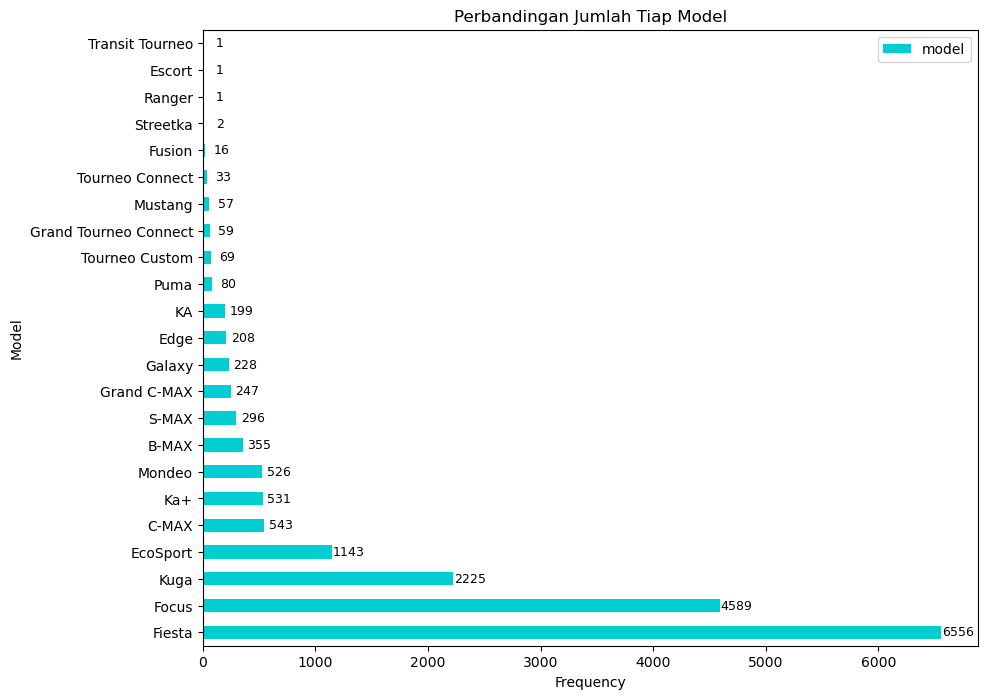

In [310]:
model = df['model'].value_counts().plot(kind='barh', figsize=(10,8), title='Perbandingan Jumlah Tiap Model', 
                                        color='darkturquoise')
for z in model.patches:
    model.annotate(format(z.get_width()),
                   (z.get_width() ,
                    z.get_y()+ z.get_height() / 2), ha='center', va='center',
                   size=9, xytext=(12, 0),
                   textcoords='offset points')
plt.legend()
plt.ylabel('Model')
plt.xlabel('Frequency')

2. Perbandingan jumlah produk dari tiap jenis transmission

Text(0, 0.5, 'Frequency')

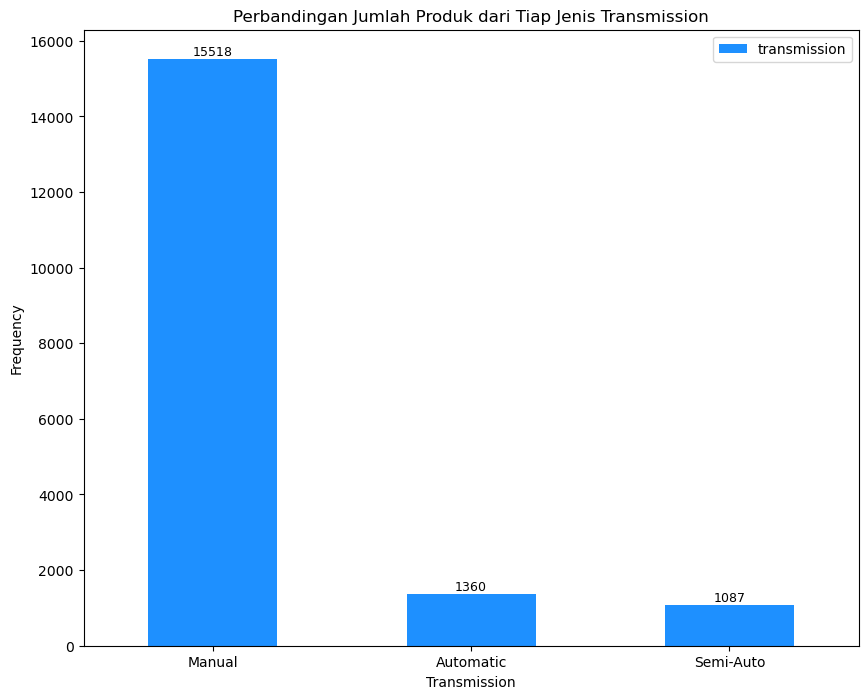

In [311]:
trans = df['transmission'].value_counts().plot(kind='bar', title='Perbandingan Jumlah Produk dari Tiap Jenis Transmission',
                                               figsize=(10, 8), color='dodgerblue')
for z in trans.patches:
    trans.annotate(format(z.get_height()),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points' )
plt.xticks(rotation=0, ha='center')
plt.legend()
plt.xlabel('Transmission')
plt.ylabel('Frequency')

3. Perbandingan jumlah produk berdasarkan Fuel Type

Text(0, 0.5, 'Frequency')

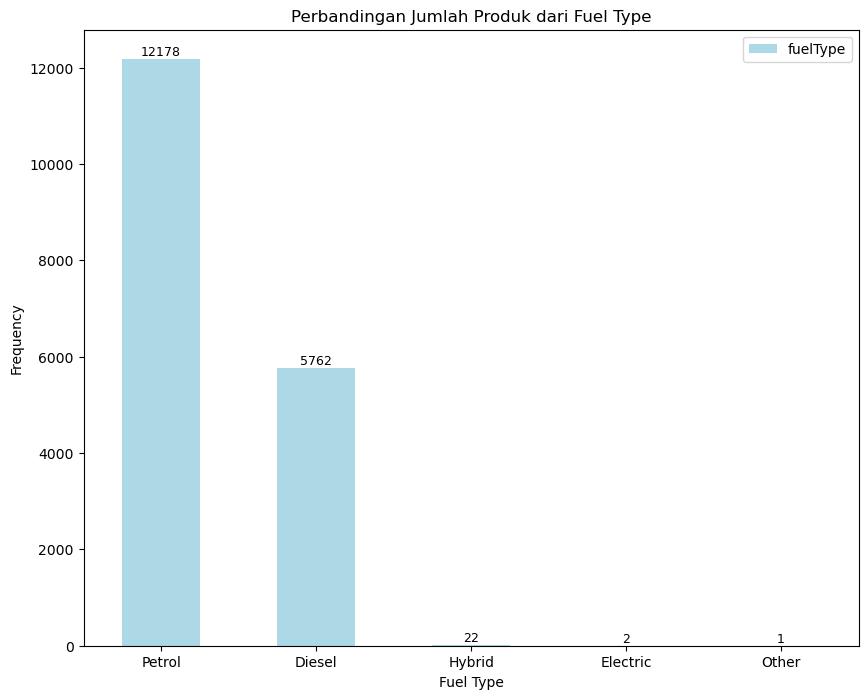

In [312]:
fuel = df['fuelType'].value_counts()
fuel2 = fuel.plot(kind='bar', figsize=(10, 8), title='Perbandingan Jumlah Produk dari Fuel Type', color='lightblue')
for z in fuel2.patches:
    fuel2.annotate(format(z.get_height()),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center')
plt.legend()
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')

4. Perbandingan jumlah produk tiap tahun produksi

(array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

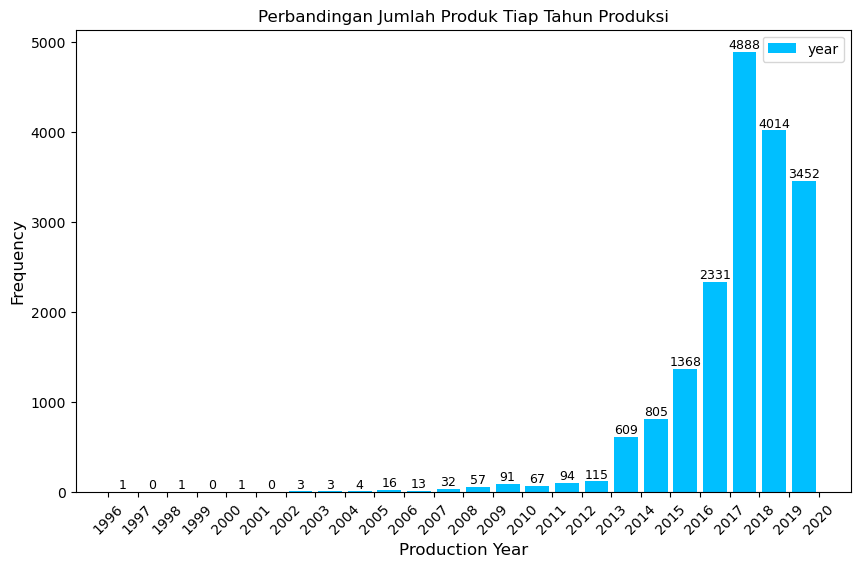

In [313]:
year2 = df[['year']].plot(kind='hist', bins=24 ,legend=True, rwidth = 0.8 ,figsize=(10,6), fontsize = 10, color='deepskyblue')
for z in year2.patches:
    year2.annotate(format(round(z.get_height())),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Perbandingan Jumlah Produk Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Frequency', fontsize =12)
xticks = np.arange(1996, 2021, 1)
plt.xticks(xticks)
plt.xticks(rotation=45, ha='center')

5. Perbandingan jumlah produk tiap ukuran mesin

Text(0, 0.5, 'Frequency')

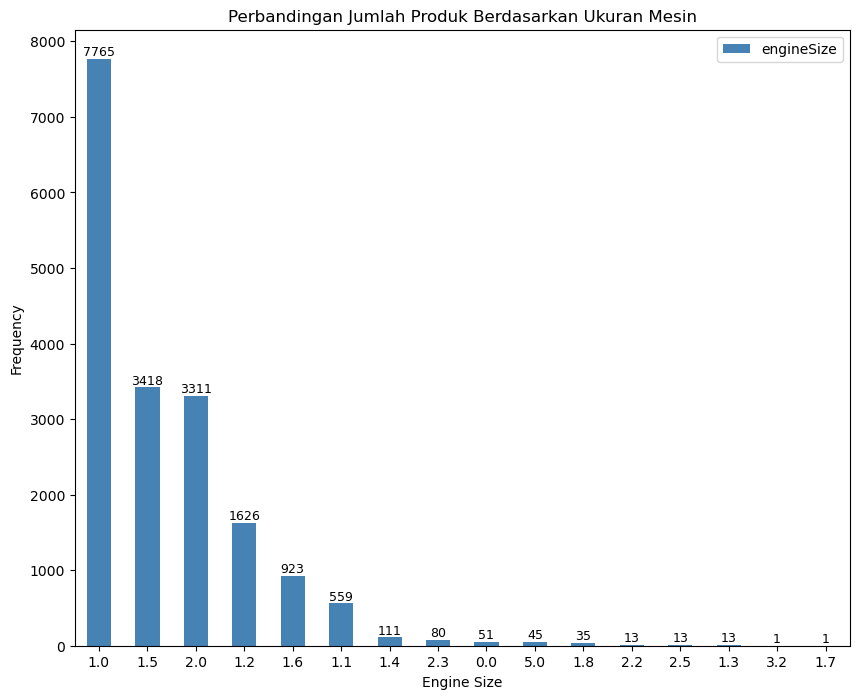

In [314]:
eng = df['engineSize'].value_counts()
eng2 = eng.plot(kind='bar', figsize=(10, 8), title='Perbandingan Jumlah Produk Berdasarkan Ukuran Mesin', color='steelblue')
for z in eng2.patches:
    eng2.annotate(format(z.get_height()),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center')
plt.legend()
plt.xlabel('Engine Size')
plt.ylabel('Frequency')

6. Perbandingan rata-rata harga produk tiap tahun produksi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020')])

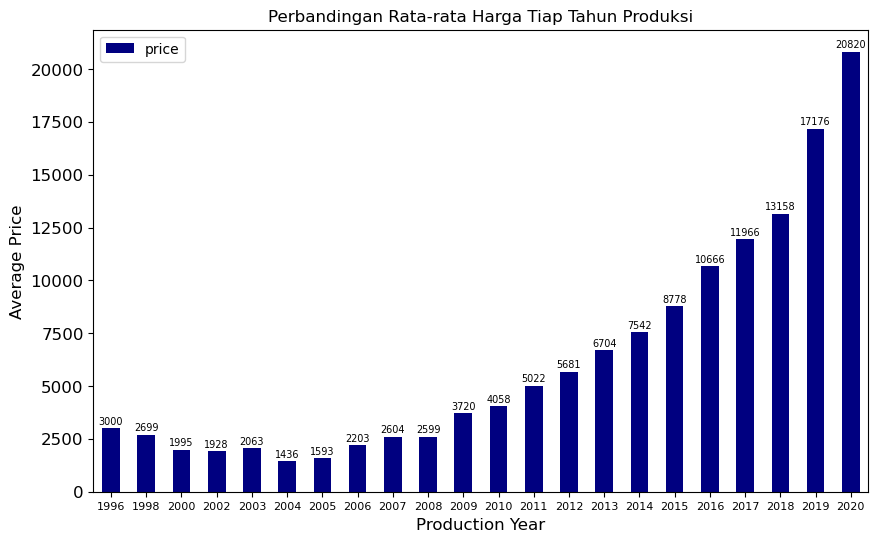

In [315]:
price_comp = df.groupby('year')['price'].mean()
price_comp2 = price_comp.plot(kind='bar', legend=True, figsize=(10,6), fontsize = 12, color='navy')
plt.title("Perbandingan Rata-rata Harga Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Price', fontsize =12)
plt.legend(loc='upper left')

for z in price_comp2.patches:
    price_comp2.annotate(format(round(z.get_height())),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size= 7, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center', fontsize=8)

7. Perbandingan rata-rata jarak tempuh tiap tahun produksi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020')])

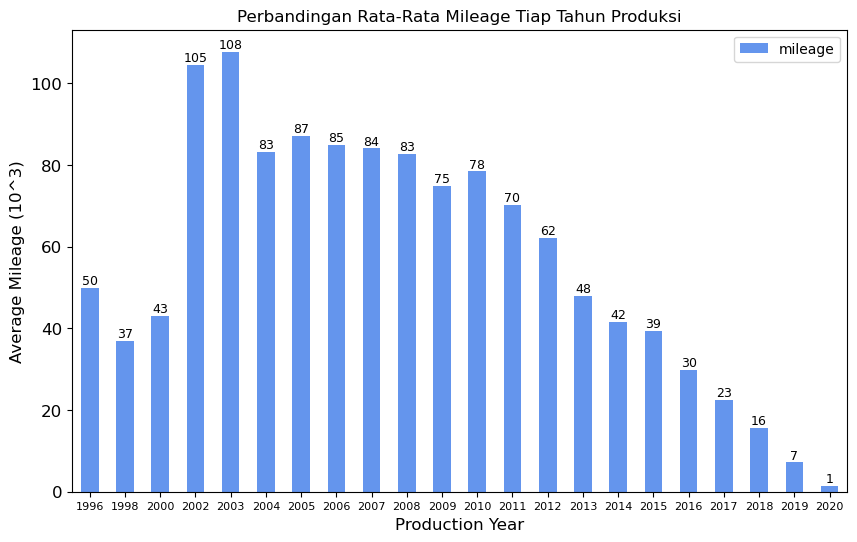

In [316]:
mil_mean = df.groupby('year')['mileage'].mean()/1000
mil_mean2 = mil_mean.plot(kind='bar', legend=True, figsize=(10,6), fontsize = 12, color='cornflowerblue')
plt.title("Perbandingan Rata-Rata Mileage Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Mileage (10^3)', fontsize =12)
plt.legend(loc='upper right')

for z in mil_mean2.patches:
    mil_mean2.annotate(format(round(z.get_height())),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center', fontsize=8)

8. Perbandingan rata-rata tax dari tiap tahun produksi 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020')])

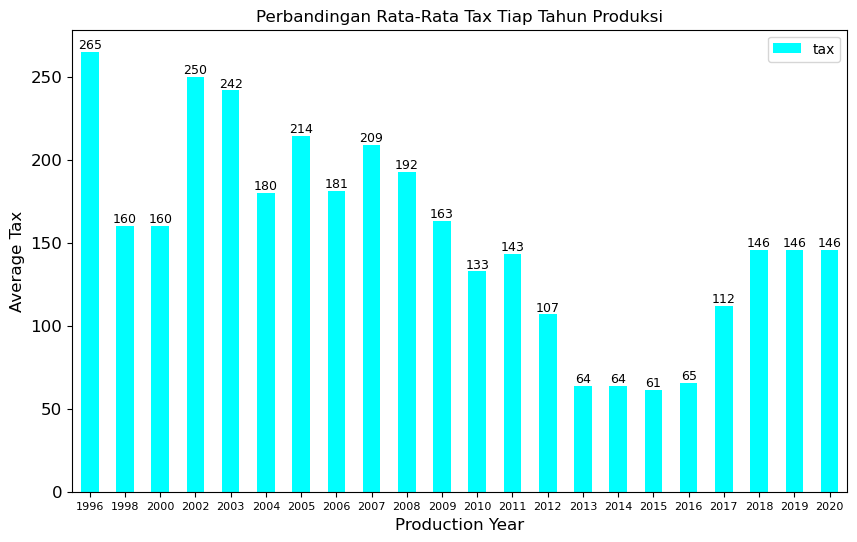

In [317]:
tax_mean = df.groupby('year')['tax'].mean()
tax_mean2 = tax_mean.plot(kind='bar', legend=True, figsize=(10,6), fontsize = 12, color='cyan')
plt.title("Perbandingan Rata-Rata Tax Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Tax', fontsize =12)
plt.legend(loc='upper right')

for z in tax_mean2.patches:
    tax_mean2.annotate(format(round(z.get_height())),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center', fontsize=8)

9. Perbandingan rata-rata MPG dari tiap tahun produksi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020')])

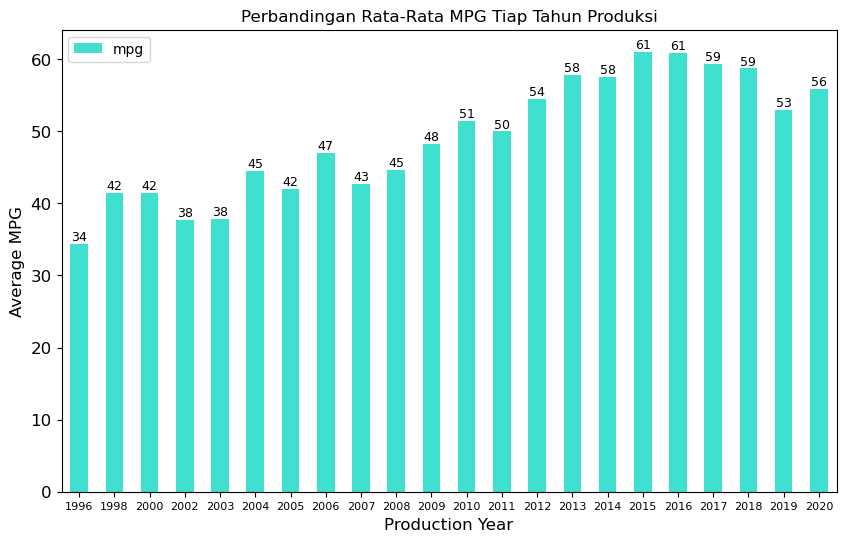

In [318]:
mpg_mean = df.groupby('year')['mpg'].mean()
mpg_mean2 = mpg_mean.plot(kind='bar', legend=True, figsize=(10,6), fontsize = 12, color='turquoise')
plt.title("Perbandingan Rata-Rata MPG Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average MPG', fontsize =12)
plt.legend(loc='upper left')

for z in mpg_mean2.patches:
    mpg_mean2.annotate(format(round(z.get_height())),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center', fontsize=8)

10. Perbandingan rata-rata ukuran mesin dari tiap tahun produksi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020')])

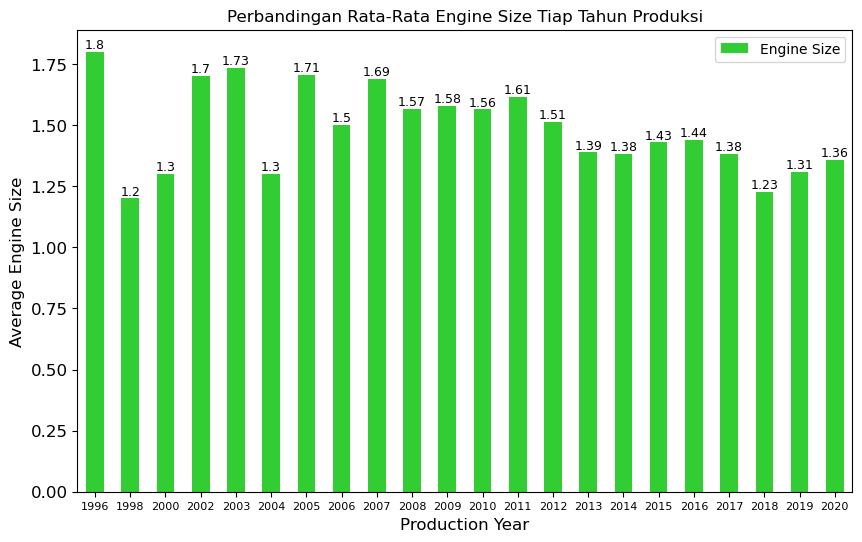

In [319]:
eng_mean = df.groupby('year')['engineSize'].mean()
eng_mean2 = eng_mean.plot(kind='bar', legend=True, label= 'Engine Size', figsize=(10,6), fontsize = 12, color='limegreen')
plt.title("Perbandingan Rata-Rata Engine Size Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Engine Size', fontsize =12)
plt.legend(loc='upper right')
for z in eng_mean2.patches:
    eng_mean2.annotate(format(round(z.get_height(),2)),
                   (z.get_x() + z.get_width() / 2,
                    z.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation= 0 , ha='center', fontsize=8)

**Penampilan Perubahan Terhadap Waktu**

--------------------------------------------------------------------------------

1. Perubahan harga tiap model mobil Ford terhadap waktu

Text(0, 0.5, 'Average Price')

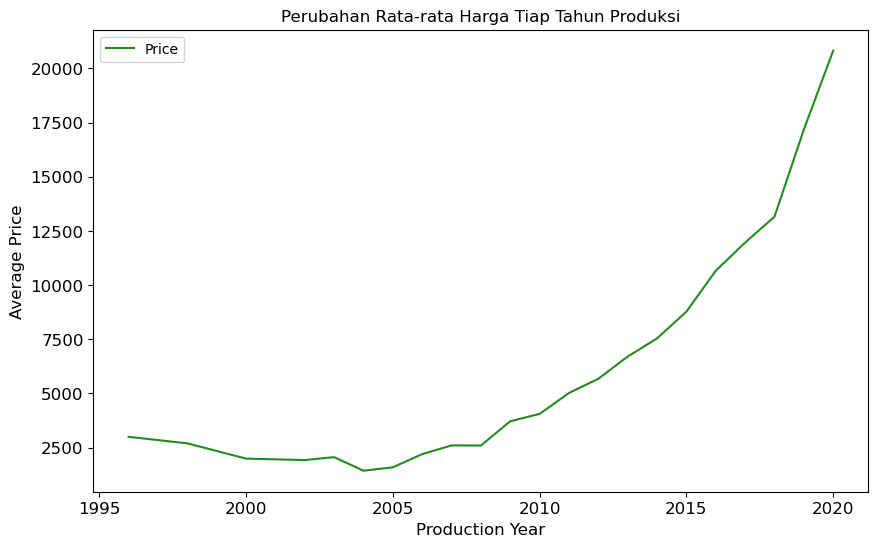

In [395]:
price_comp = df.groupby('year')['price'].mean()
price_comp.plot(kind='line', legend=True, figsize=(10,6), fontsize = 12, label="Price", color='forestgreen')
plt.title("Perubahan Rata-rata Harga Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Price', fontsize =12)

Rincian perubahan harga tiap model mobil Ford terhadap waktu

In [321]:
df2 = pd.DataFrame(df.loc[df['model'] == 'Fiesta'][['year','price']].sort_values(['year'], ascending=True))
df3 = pd.DataFrame(df.loc[df['model'] == 'Focus'][['year','price']])
df4 = pd.DataFrame(df.loc[df['model'] == 'Kuga'][['year','price']])
df5 = pd.DataFrame(df.loc[df['model'] == 'EcoSport'][['year','price']])
df6 = pd.DataFrame(df.loc[df['model'] == 'C-MAX'][['year','price']])
df7 = pd.DataFrame(df.loc[df['model'] == 'Ka+'][['year','price']])
df8 = pd.DataFrame(df.loc[df['model'] == 'Mondeo'][['year','price']])

df9  = pd.DataFrame(df.loc[df['model'] == 'B-MAX'][['year','price']])
df10 = pd.DataFrame(df.loc[df['model'] == 'S-MAX'][['year','price']])
df11 = pd.DataFrame(df.loc[df['model'] == 'Grand C-MAX'][['year','price']])
df12 = pd.DataFrame(df.loc[df['model'] == 'Galaxy'][['year','price']])
df13 = pd.DataFrame(df.loc[df['model'] == 'Edge'][['year','price']])
df14 = pd.DataFrame(df.loc[df['model'] == 'KA'][['year','price']])
df15 = pd.DataFrame(df.loc[df['model'] == 'Puma'][['year','price']])
df16 = pd.DataFrame(df.loc[df['model'] == 'Tourneo Custom'][['year','price']])
df17 = pd.DataFrame(df.loc[df['model'] == 'Grand Tourneo Connect'][['year','price']])
df18 = pd.DataFrame(df.loc[df['model'] == 'Mustang'][['year','price']])
df19 = pd.DataFrame(df.loc[df['model'] == 'Tourneo Connect'][['year','price']])
df20 = pd.DataFrame(df.loc[df['model'] == 'Fusion'][['year','price']])
df21 = pd.DataFrame(df.loc[df['model'] == 'Streetka'][['year','price']])
df22 = pd.DataFrame(df.loc[(df['model'] == 'Ranger') | (df['model'] == 'Escort') | 
                           (df['model'] == 'Transit Tourneo')][['model','year','price']])


Text(0.5, 0, 'Production Year')

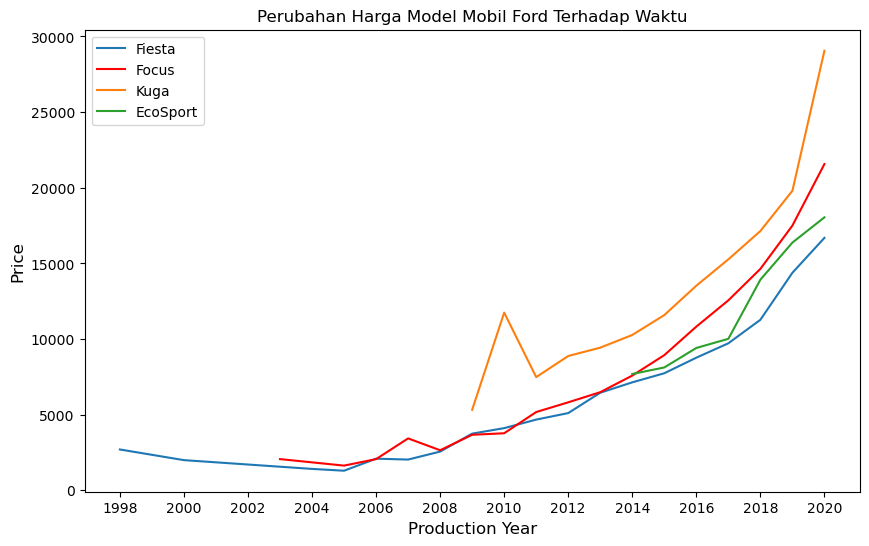

In [322]:
df2.groupby(['year'])['price'].mean().round().plot(kind='line', x='year', y='price', xlabel='year', figsize=(10,6), label='Fiesta')
df3.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Focus', color= 'red')
df4.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Kuga')
axes = df5.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='EcoSport')

plt.legend()
plt.title('Perubahan Harga Model Mobil Ford Terhadap Waktu')
xticks = np.arange(1998, 2022, 2)
plt.xticks(xticks)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Production Year', fontsize=12)

Text(0.5, 1.0, 'Perubahan Harga Model Mobil Ford Terhadap Waktu')

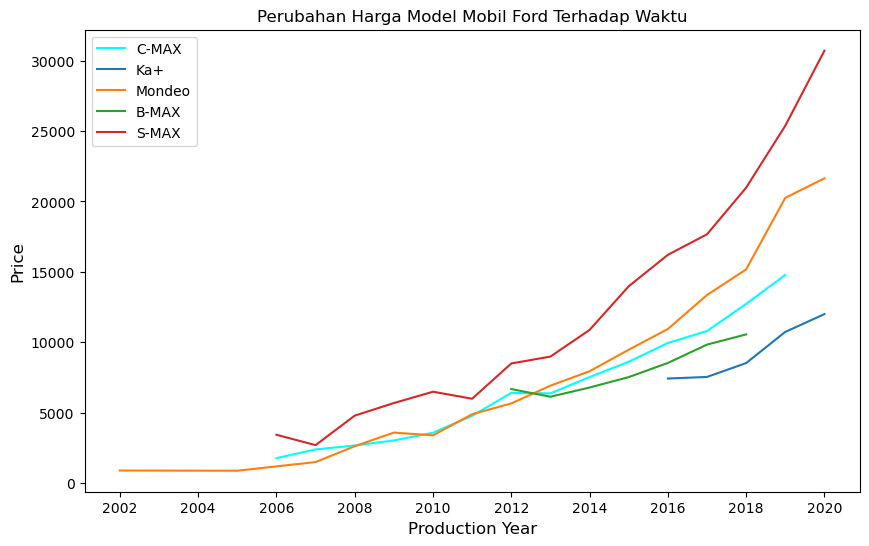

In [323]:
df6.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='C-MAX', figsize=(10,6), color='cyan')
df7.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Ka+')
df8.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Mondeo')
df9.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='B-MAX')
df10.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='S-MAX')

xticks = np.arange(2002, 2022, 2)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.xticks(xticks)
plt.legend()
plt.title('Perubahan Harga Model Mobil Ford Terhadap Waktu')

([<matplotlib.axis.XTick at 0x15ff9dfa190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

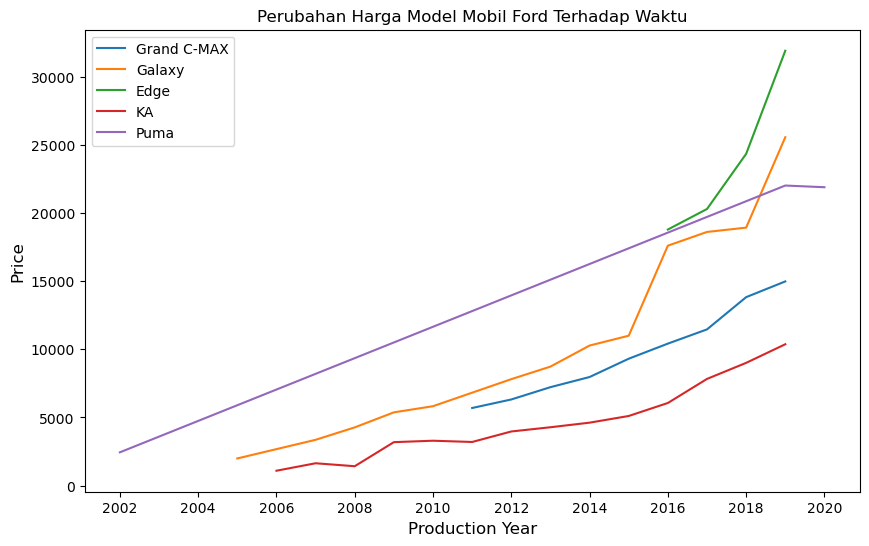

In [324]:
df11.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Grand C-MAX', figsize=(10,6))
df12.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Galaxy')
df13.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Edge')
df14.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='KA')
df15.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Puma')

plt.legend()
plt.ylabel('Price', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.title('Perubahan Harga Model Mobil Ford Terhadap Waktu')
xticks = np.arange(2002, 2022, 2)
plt.xticks(xticks)

([<matplotlib.axis.XTick at 0x15ffa839250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

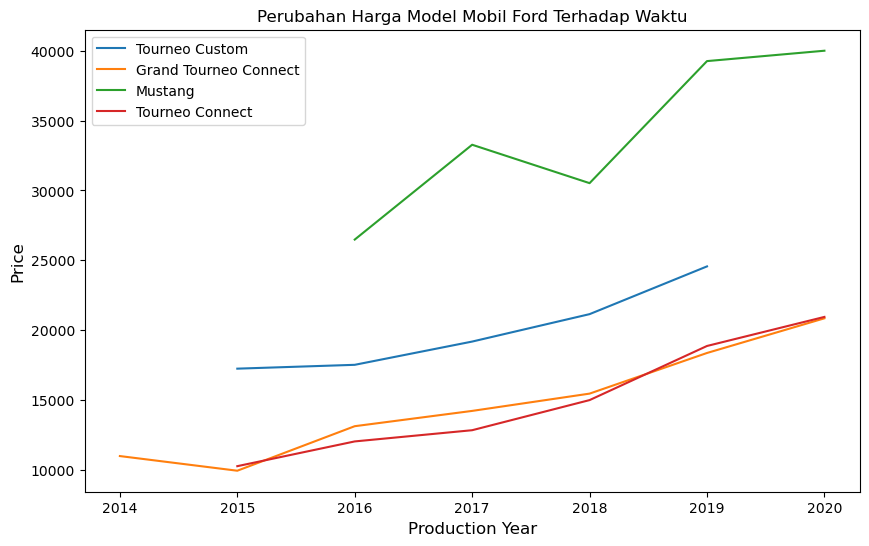

In [325]:
df16.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Tourneo Custom', figsize=(10,6))
df17.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Grand Tourneo Connect')
df18.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Mustang')
df19.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Tourneo Connect')

plt.legend()
plt.ylabel('Price', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.title('Perubahan Harga Model Mobil Ford Terhadap Waktu')
xticks = np.arange(2014, 2021, 1)
plt.xticks(xticks)

([<matplotlib.axis.XTick at 0x15ffa8b7f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

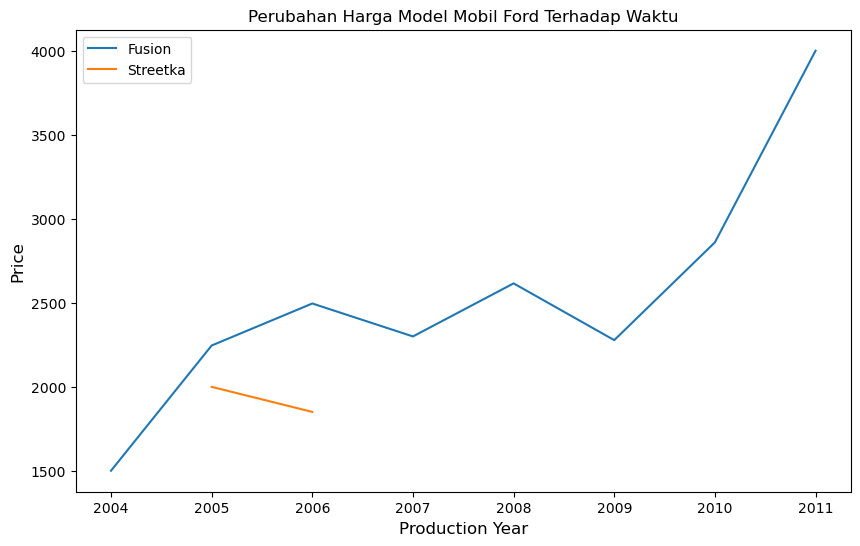

In [326]:
df20.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Fusion', figsize=(10,6))
df21.groupby(['year'])['price'].mean().plot(kind='line', x='year', y='price', label='Streetka')

plt.legend()
plt.ylabel('Price', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.title('Perubahan Harga Model Mobil Ford Terhadap Waktu')
xticks = np.arange(2004, 2012, 1)
plt.xticks(xticks)

Mobil Ford dengan model Ranger, Escort, dan Transit Tourneo tidak dapat dibuat perubahan terhadap waktu karena hanya memiliki 1 baris data

Harga Mobil Ford Model Ranger, Escort, dan Transit Tourneo

Text(2.0, 12750, 'Transit Tourneo')

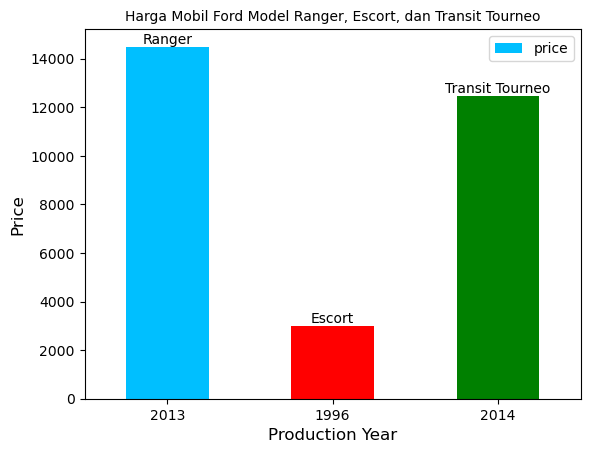

In [327]:
c = ['deepskyblue', 'red', 'green']
df23 = df22.plot(kind='bar', x='year', y='price', color = c)
plt.title('Harga Mobil Ford Model Ranger, Escort, dan Transit Tourneo', fontsize=10)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Price', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.legend()

plt.text(-0.25 + 0.5/2, 14495 + 300, "Ranger", ha='center', va='center')
plt.text(0.75 + 0.5/2, 3000 + 300, "Escort", ha='center', va='center')
plt.text(1.75 + 0.5/2, 12450 + 300, "Transit Tourneo", ha='center', va='center') 


2. Perubahan jarak tempuh tiap model mobil Ford terhadap waktu

([<matplotlib.axis.XTick at 0x15ffa9a2310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

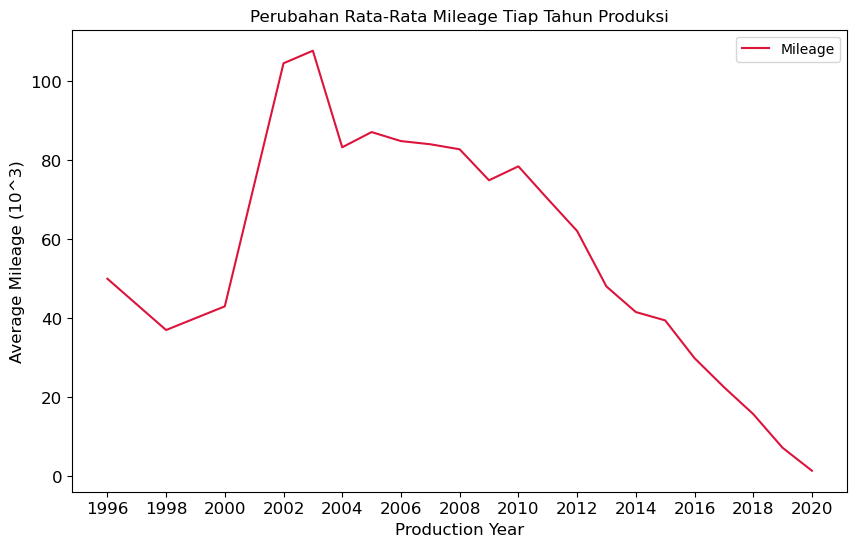

In [328]:
mil_mean = df.groupby('year')['mileage'].mean()/1000
mil_mean.plot(kind='line', legend=True, figsize=(10,6), fontsize = 12, label='Mileage', color='crimson')
plt.title("Perubahan Rata-Rata Mileage Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Mileage (10^3)', fontsize =12)
xticks = np.arange(1996, 2022, 2)
plt.xticks(xticks)

Rincian perubahan jarak tempuh tiap model mobil Ford terhadap waktu

In [329]:
mil2  = pd.DataFrame(df.loc[df['model'] == 'Fiesta'][['year','mileage']].sort_values(['year'], ascending=True))
mil3  = pd.DataFrame(df.loc[df['model'] == 'Focus'][['year','mileage']])
mil4  = pd.DataFrame(df.loc[df['model'] == 'Kuga'][['year','mileage']])
mil5  = pd.DataFrame(df.loc[df['model'] == 'EcoSport'][['year','mileage']])
mil6  = pd.DataFrame(df.loc[df['model'] == 'C-MAX'][['year','mileage']])
mil7  = pd.DataFrame(df.loc[df['model'] == 'Ka+'][['year','mileage']])
mil8  = pd.DataFrame(df.loc[df['model'] == 'Mondeo'][['year','mileage']])

mil9  = pd.DataFrame(df.loc[df['model'] == 'B-MAX'][['year','mileage']])
mil10 = pd.DataFrame(df.loc[df['model'] == 'S-MAX'][['year','mileage']])
mil11 = pd.DataFrame(df.loc[df['model'] == 'Grand C-MAX'][['year','mileage']])
mil12 = pd.DataFrame(df.loc[df['model'] == 'Galaxy'][['year','mileage']])
mil13 = pd.DataFrame(df.loc[df['model'] == 'Edge'][['year','mileage']])
mil14 = pd.DataFrame(df.loc[df['model'] == 'KA'][['year','mileage']])
mil15 = pd.DataFrame(df.loc[df['model'] == 'Puma'][['year','mileage']])
mil16 = pd.DataFrame(df.loc[df['model'] == 'Tourneo Custom'][['year','mileage']])
mil17 = pd.DataFrame(df.loc[df['model'] == 'Grand Tourneo Connect'][['year','mileage']])
mil18 = pd.DataFrame(df.loc[df['model'] == 'Mustang'][['year','mileage']])
mil19 = pd.DataFrame(df.loc[df['model'] == 'Tourneo Connect'][['year','mileage']])
mil20 = pd.DataFrame(df.loc[df['model'] == 'Fusion'][['year','mileage']])
mil21 = pd.DataFrame(df.loc[df['model'] == 'Streetka'][['year','mileage']])
mil22 = pd.DataFrame(df.loc[(df['model'] == 'Ranger') | (df['model'] == 'Escort') | 
                           (df['model'] == 'Transit Tourneo')][['model','year','mileage']])


Text(0.5, 0, 'Production Year')

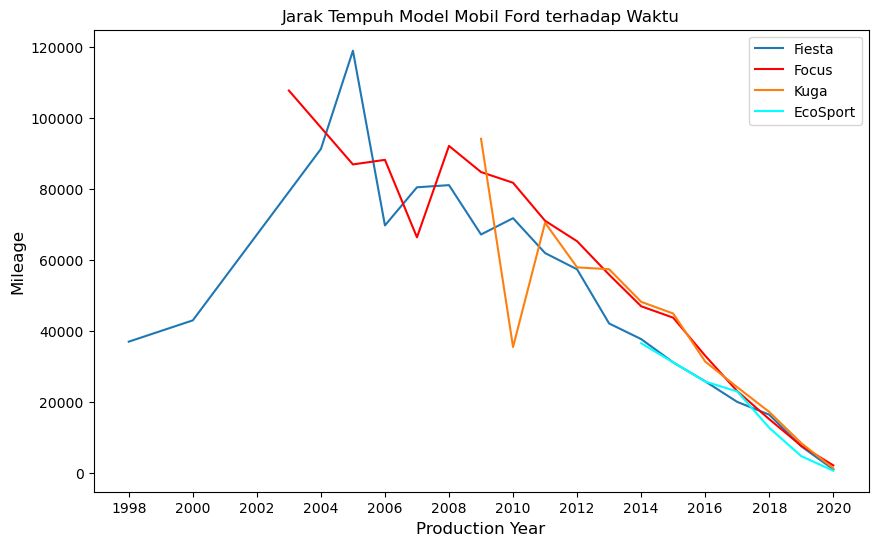

In [330]:
mil2.groupby(['year'])['mileage'].mean().round().plot(kind='line', x='year', y='mileage', xlabel='year', figsize=(10,6), label='Fiesta')
mil3.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Focus', color= 'red')
mil4.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Kuga')
mil5.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='EcoSport', color='cyan')

plt.legend()
plt.title('Jarak Tempuh Model Mobil Ford terhadap Waktu')
xticks = np.arange(1998, 2022, 2)
plt.xticks(xticks)
plt.ylabel('Mileage', fontsize=12)
plt.xlabel('Production Year', fontsize=12)

Text(0.5, 1.0, 'Jarak Tempuh Model Mobil Ford terhadap Waktu')

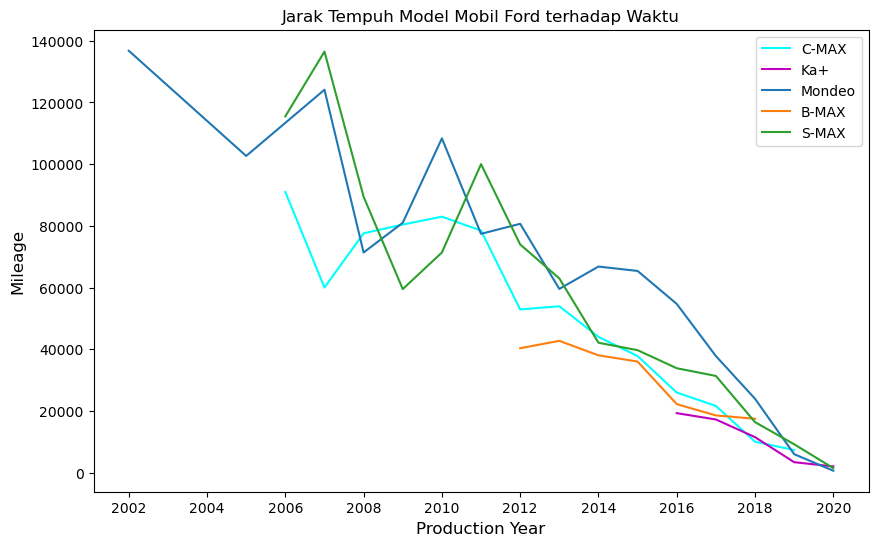

In [331]:
mil6.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='C-MAX', figsize=(10,6), color='cyan')
mil7.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Ka+', color='m')
mil8.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Mondeo')
mil9.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='B-MAX')
mil10.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='S-MAX')

xticks = np.arange(2002, 2022, 2)
plt.ylabel('Mileage', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.xticks(xticks)
plt.legend()
plt.title('Jarak Tempuh Model Mobil Ford terhadap Waktu')

([<matplotlib.axis.XTick at 0x15ffb11e430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

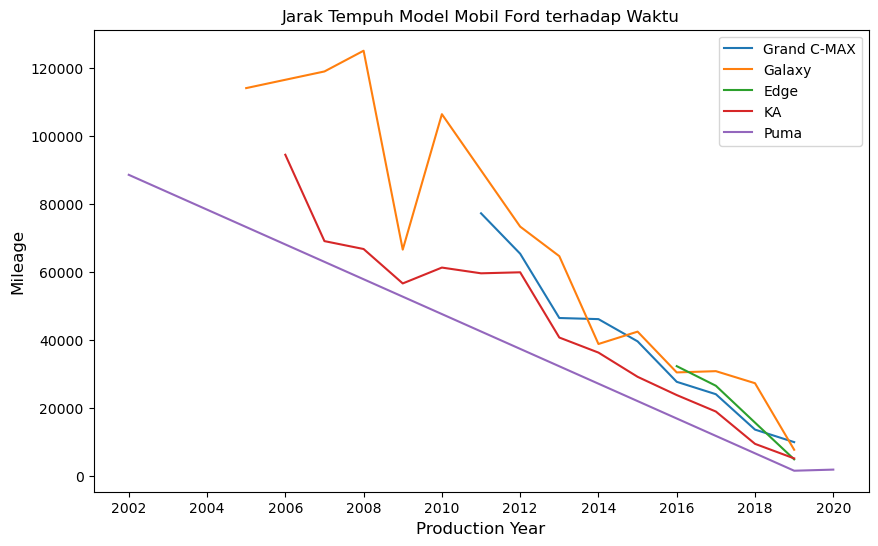

In [332]:
mil11.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Grand C-MAX', figsize=(10,6))
mil12.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Galaxy')
mil13.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Edge')
mil14.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='KA')
mil15.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Puma')

plt.legend()
plt.ylabel('Mileage', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.title('Jarak Tempuh Model Mobil Ford terhadap Waktu')
xticks = np.arange(2002, 2022, 2)
plt.xticks(xticks)

([<matplotlib.axis.XTick at 0x15ffb1ab5e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

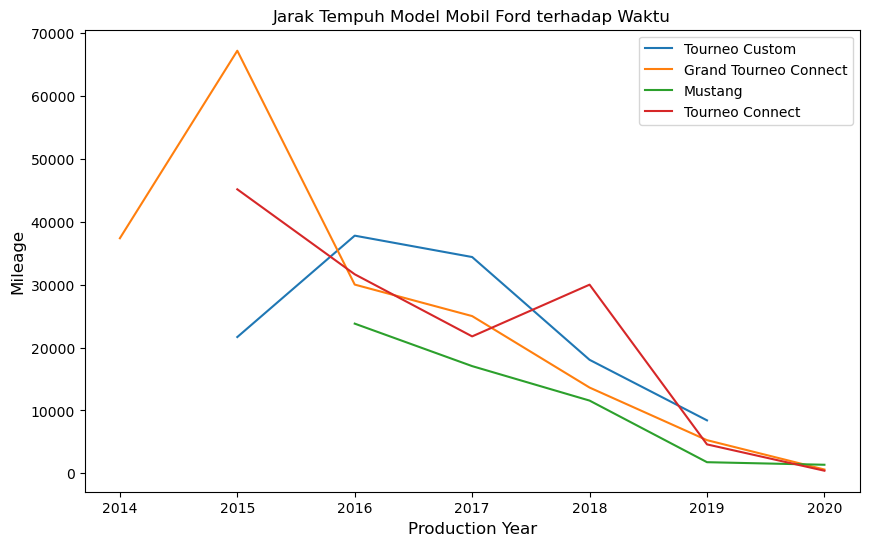

In [333]:
mil16.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Tourneo Custom', figsize=(10,6))
mil17.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Grand Tourneo Connect')
mil18.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Mustang')
mil19.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Tourneo Connect')

plt.legend()
plt.ylabel('Mileage', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.title('Jarak Tempuh Model Mobil Ford terhadap Waktu')
xticks = np.arange(2014, 2021, 1)
plt.xticks(xticks)

([<matplotlib.axis.XTick at 0x15ffb341970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

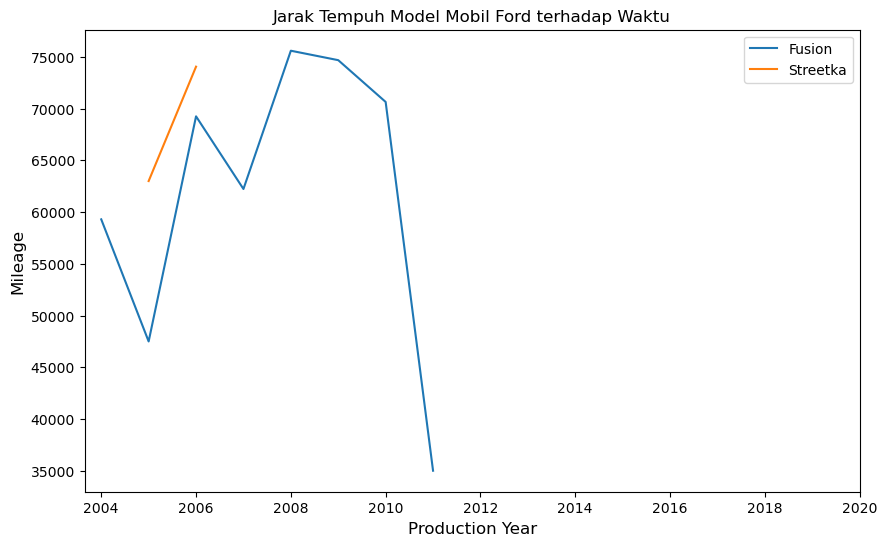

In [334]:
mil20.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Fusion', figsize=(10,6))
mil21.groupby(['year'])['mileage'].mean().plot(kind='line', x='year', y='mileage', label='Streetka')
plt.legend()
plt.ylabel('Mileage', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.title('Jarak Tempuh Model Mobil Ford terhadap Waktu')
xticks = np.arange(2004, 2022, 2)
plt.xticks(xticks)

Text(2.0, 20996, 'Transit Tourneo')

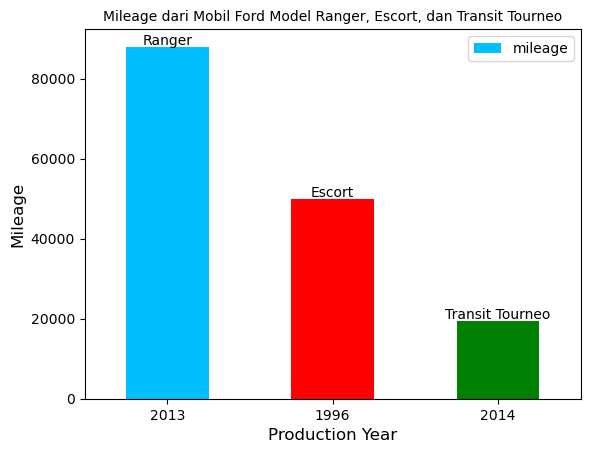

In [335]:
c = ['deepskyblue', 'red', 'green']
mil23 = mil22.plot(kind='bar', x='year', y='mileage', color= c)

plt.title('Mileage dari Mobil Ford Model Ranger, Escort, dan Transit Tourneo', fontsize=10)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Mileage', fontsize=12)
plt.xlabel('Production Year', fontsize=12)
plt.legend()

plt.text(-0.25 + 0.5/2, 88000 + 1500, "Ranger", ha='center', va='center')
plt.text(0.75 + 0.5/2, 50000 + 1500, "Escort", ha='center', va='center')
plt.text(1.75 + 0.5/2, 19496 + 1500, "Transit Tourneo", ha='center', va='center') 


3. Perubahan rata-rata tax mobil Ford terhadap waktu

([<matplotlib.axis.XTick at 0x15ffbd36dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

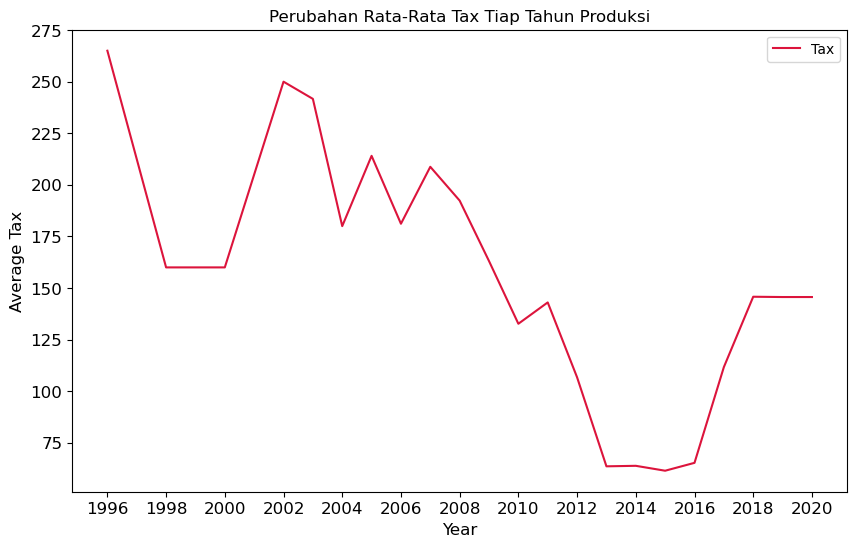

In [336]:
tax_mean.plot(kind='line', legend=True, figsize=(10,6), fontsize = 12, label='Tax', color='crimson')
plt.title("Perubahan Rata-Rata Tax Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Year', fontsize =12)
plt.ylabel('Average Tax', fontsize =12)
xticks = np.arange(1996, 2022, 2)
plt.xticks(xticks)

4. Perubahan rata-rata MPG terhadap waktu

([<matplotlib.axis.XTick at 0x15ffbdb4bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

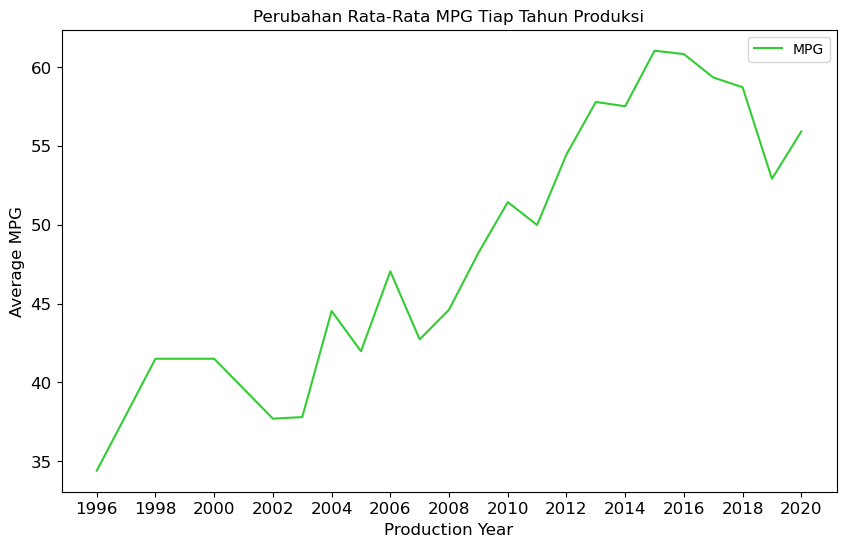

In [337]:
mpg_mean.plot(kind='line', legend=True, figsize=(10,6), fontsize = 12, label="MPG", color='limegreen')
plt.title("Perubahan Rata-Rata MPG Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average MPG', fontsize =12)
xticks = np.arange(1996, 2022, 2)
plt.xticks(xticks)

5. Perubahan rata-rata ukuran mesin mobil Ford terhadap waktu

([<matplotlib.axis.XTick at 0x15ffbe29940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

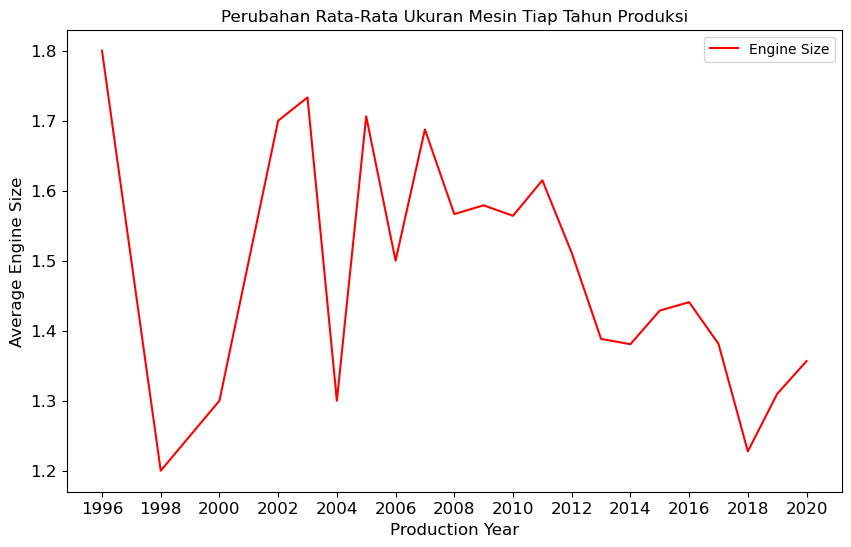

In [338]:
eng_mean.plot(kind='line', legend=True, label= 'Engine Size', figsize=(10,6), fontsize = 12, color='red')
plt.title("Perubahan Rata-Rata Ukuran Mesin Tiap Tahun Produksi", fontsize=12)
plt.xlabel('Production Year', fontsize =12)
plt.ylabel('Average Engine Size', fontsize =12)
xticks = np.arange(1996, 2022, 2)
plt.xticks(xticks)

**Penampilan hierarki dan hubungan keseluruhan-bagian**

--------------------------------------------------------------------------------------

1. Model

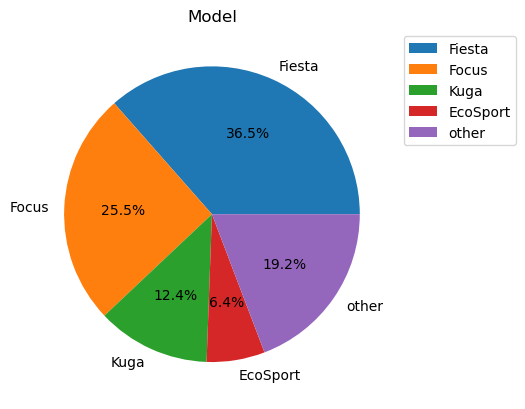

In [339]:
totals = df['model'].value_counts()
proportions = totals/ totals.sum()

threshold = 0.05
below_thresh_mask = proportions < threshold
plot_data = proportions[~below_thresh_mask]
plot_data.loc['other'] = proportions[below_thresh_mask].sum()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    plot_data, labels=plot_data.index, autopct='%1.1f%%'
)
plt.title('Model')
ax.legend(bbox_to_anchor=(1, 1))

2.Tahun

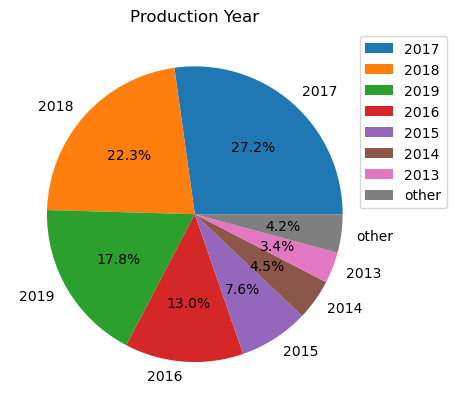

In [340]:
totals = df['year'].value_counts()
proportions = totals/ totals.sum()

threshold = 0.03
below_thresh_mask = proportions < threshold
plot_data = proportions[~below_thresh_mask]
plot_data.loc['other'] = proportions[below_thresh_mask].sum()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    plot_data, labels=plot_data.index, autopct='%1.1f%%'
)
plt.title('Production Year')
ax.legend(bbox_to_anchor=(1.2, 1))

3. Transmission

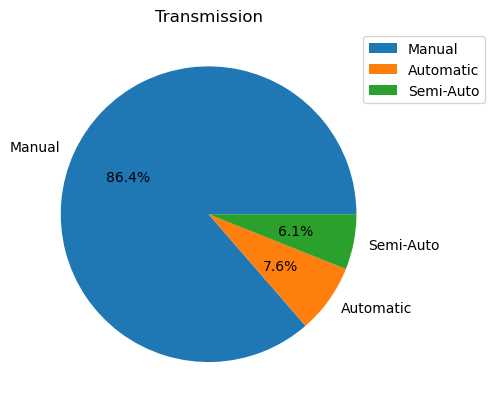

In [341]:
ax = plt.subplots()
df['transmission'].value_counts().plot(kind="pie", autopct='%1.1f%%', label="", title="Transmission")
plt.legend(bbox_to_anchor=(0.9, 1))

4. Fuel Type

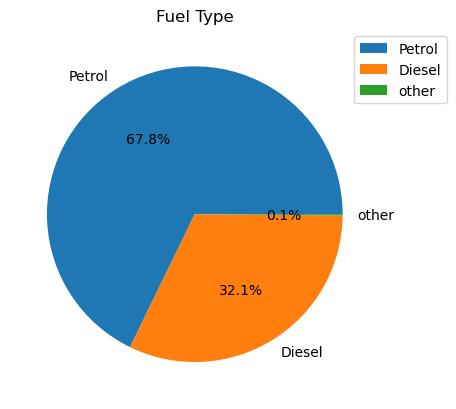

In [342]:
totals = df['fuelType'].value_counts()
proportions = totals/ totals.sum()

threshold = 0.05
below_thresh_mask = proportions < threshold
plot_data = proportions[~below_thresh_mask]
plot_data.loc['other'] = proportions[below_thresh_mask].sum()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    plot_data, labels=plot_data.index, autopct='%1.1f%%'
)
plt.title('Fuel Type')
ax.legend(bbox_to_anchor=(1.2, 1))

5. Engine Size

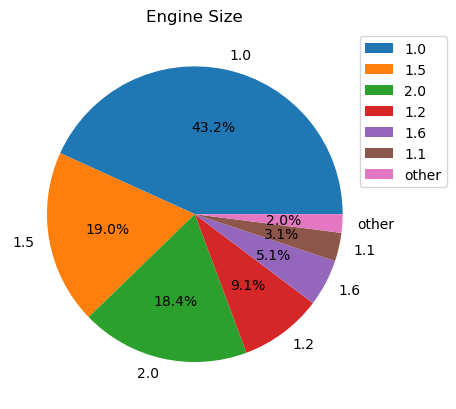

In [343]:
totals = df['engineSize'].value_counts()
proportions = totals/ totals.sum()

threshold = 0.03
below_thresh_mask = proportions < threshold
plot_data = proportions[~below_thresh_mask]
plot_data.loc['other'] = proportions[below_thresh_mask].sum()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    plot_data, labels=plot_data.index, autopct='%1.1f%%'
)
plt.title('Engine Size')
ax.legend(bbox_to_anchor=(1.2, 1))

**Plotting Relationships**

--------------------------------------------------------------------------------------

Disatukan dengan korelasi

# Korelasi dan Plotting Relationships

**Korelasi tahun produksi dengan harga**

--------------------------------------------------------------------------------------

In [396]:
data_yp = df.groupby(['year'])['price'].mean().reset_index()
data_yp['year'].corr(data_yp['price'])

0.8406708485402633

Text(0, 0.5, 'Price')

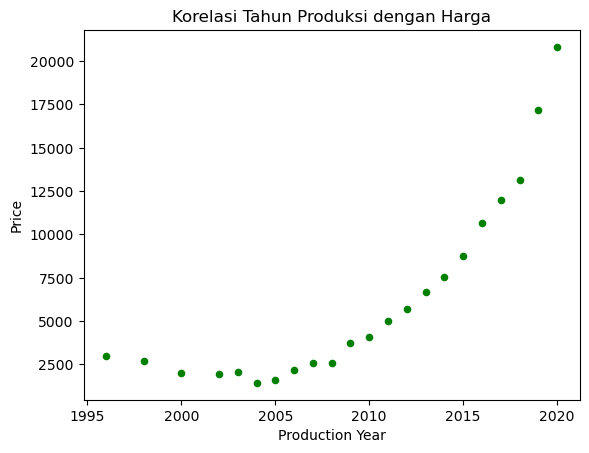

In [397]:
df.groupby(['year'])['price'].mean().reset_index().plot(x="year", y="price", kind="scatter", color='green')
plt.title('Korelasi Tahun Produksi dengan Harga')
plt.xlabel('Production Year')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

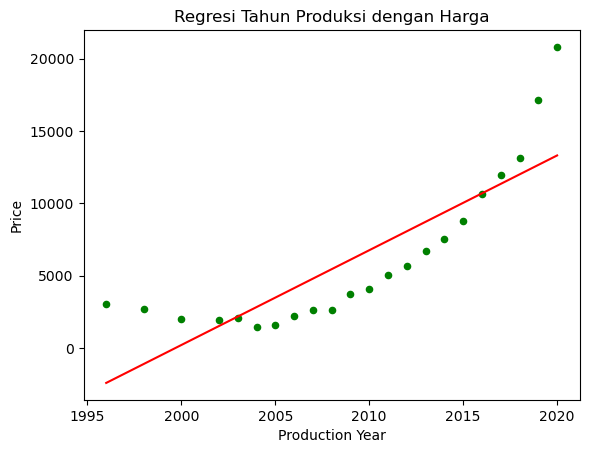

In [399]:
reg1 = df.groupby(['year'])['price'].mean().reset_index()
reg1.plot(x="year", y="price", kind="scatter", color = 'green')
x = reg1[["year"]]
y = reg1[["price"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Tahun Produksi dengan Harga')
plt.xlabel('Production Year')
plt.ylabel('Price')

**Korelasi tahun produksi dengan jarak tempuh**

--------------------------------------------------------------------------------------

In [400]:
data_ym = df.groupby(['year'])['mileage'].mean().reset_index()
data_ym['year'].corr(data_ym['mileage'])

-0.6021047903053383

Text(0, 0.5, 'Mileage')

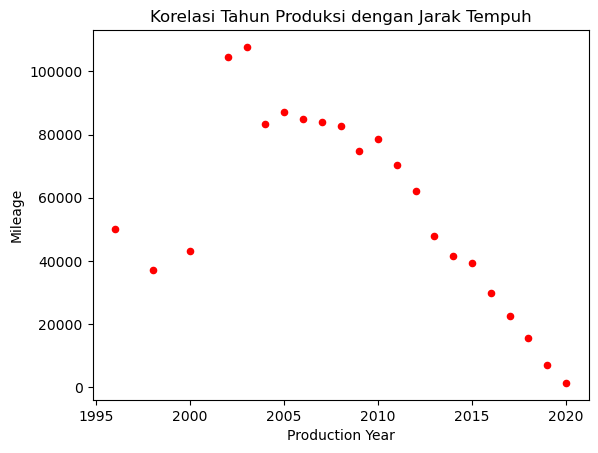

In [401]:
df.groupby(['year'])['mileage'].mean().reset_index().plot(x="year", y="mileage", kind="scatter", color='red')
plt.title('Korelasi Tahun Produksi dengan Jarak Tempuh')
plt.xlabel('Production Year')
plt.ylabel('Mileage')

Text(0, 0.5, 'Mileage')

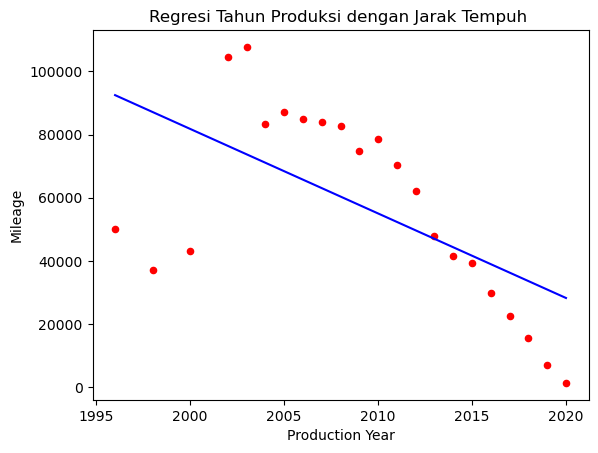

In [402]:
reg1 = df.groupby(['year'])['mileage'].mean().reset_index()
reg1.plot(x="year", y="mileage", kind="scatter", color = 'red')
x = reg1[["year"]]
y = reg1[["mileage"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "blue")
plt.title('Regresi Tahun Produksi dengan Jarak Tempuh ')
plt.xlabel('Production Year')
plt.ylabel('Mileage')

**Korelasi tahun produksi dengan tax**

--------------------------------------------------------------------------------------

In [403]:
data_yt = df.groupby(['year'])['tax'].mean().reset_index()
data_yt['year'].corr(data_yt['tax'])

-0.6953031177620432

Text(0, 0.5, 'Tax')

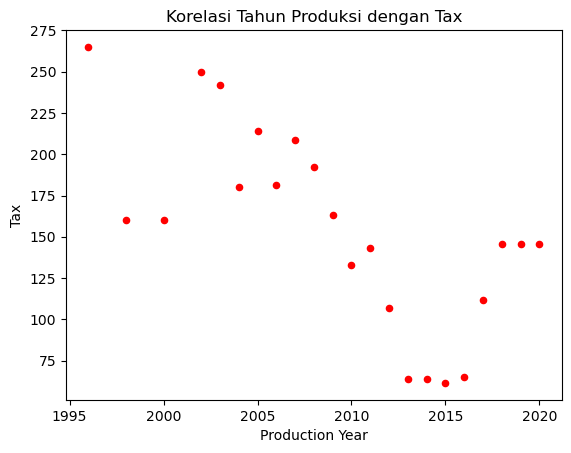

In [404]:
df.groupby(['year'])['tax'].mean().reset_index().plot(x="year", y="tax", kind="scatter", color='red')
plt.title('Korelasi Tahun Produksi dengan Tax')
plt.xlabel('Production Year')
plt.ylabel('Tax')

Text(0, 0.5, 'Tax')

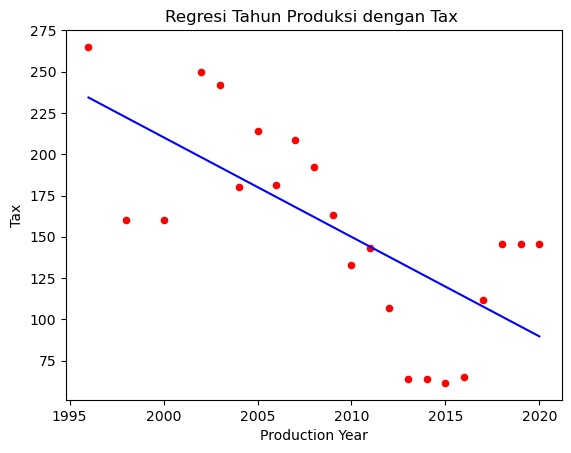

In [405]:
reg1 = df.groupby(['year'])['tax'].mean().reset_index()
reg1.plot(x="year", y="tax", kind="scatter", color = 'red')
x = reg1[["year"]]
y = reg1[["tax"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "blue")
plt.title('Regresi Tahun Produksi dengan Tax ')
plt.xlabel('Production Year')
plt.ylabel('Tax')

**Korelasi tahun produksi dengan mpg**

--------------------------------------------------------------------------------------

In [421]:
data_ymp = df.groupby(['year'])['mpg'].mean().reset_index()
data_ymp['year'].corr(data_ymp['mpg'])

0.9053781593233321

Text(0, 0.5, 'MPG')

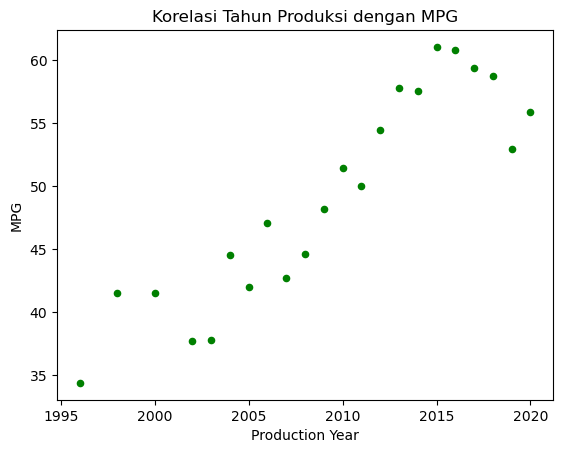

In [424]:
df.groupby(['year'])['mpg'].mean().reset_index().plot(x="year", y="mpg", kind="scatter", color='green')
plt.title('Korelasi Tahun Produksi dengan MPG')
plt.xlabel('Production Year')
plt.ylabel('MPG')


Text(0, 0.5, 'MPG')

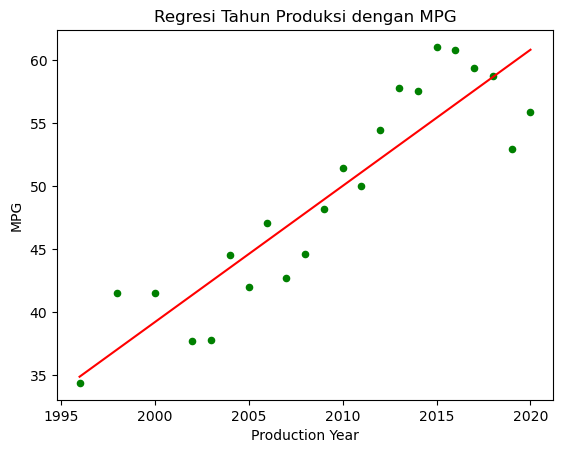

In [423]:
reg1 = df.groupby(['year'])['mpg'].mean().reset_index()
reg1.plot(x="year", y="mpg", kind="scatter", color = 'green')
x = reg1[["year"]]
y = reg1[["mpg"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Tahun Produksi dengan MPG')
plt.xlabel('Production Year')
plt.ylabel('MPG')

**Korelasi tahun produksi dengan ukuran mesin**

--------------------------------------------------------------------------------------

In [409]:
data_ye = df.groupby(['year'])['engineSize'].mean().reset_index()
data_ye['year'].corr(data_ye['engineSize'])

-0.4025388134158708

Text(0, 0.5, 'Engine Size')

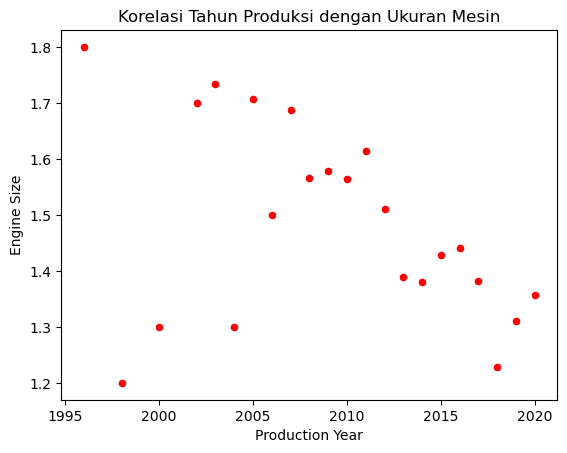

In [425]:
df.groupby(['year'])['engineSize'].mean().reset_index().plot(x="year", y="engineSize", kind="scatter", color='red')
plt.title('Korelasi Tahun Produksi dengan Ukuran Mesin')
plt.xlabel('Production Year')
plt.ylabel('Engine Size')

Text(0, 0.5, 'Engine Size')

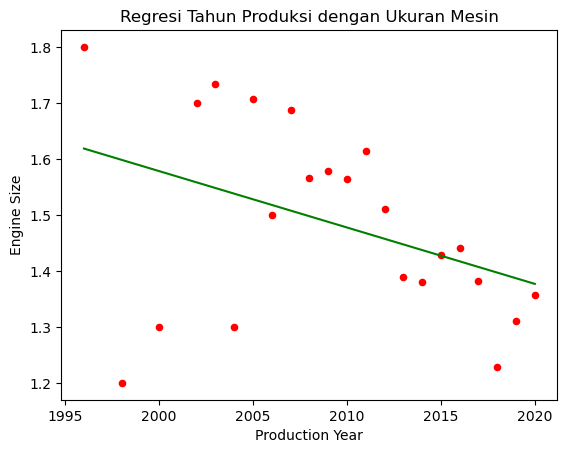

In [426]:
reg1 = df.groupby(['year'])['engineSize'].mean().reset_index()
reg1.plot(x="year", y="engineSize", kind="scatter", color = 'red')
x = reg1[["year"]]
y = reg1[["engineSize"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "green")
plt.title('Regresi Tahun Produksi dengan Ukuran Mesin')
plt.xlabel('Production Year')
plt.ylabel('Engine Size')

**Korelasi harga dengan jarak tempuh**

--------------------------------------------------------------------------------------

In [412]:
data_pm = df.groupby(['price'])['mileage'].mean().reset_index()
data_pm['price'].corr(data_pm['mileage'])

-0.6205706074795307

Text(0, 0.5, 'Mileage')

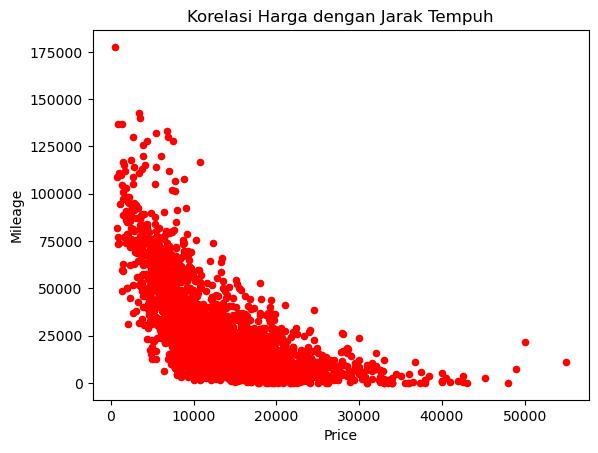

In [427]:

df = pd.read_csv('ford.csv')
df.groupby(['price'])['mileage'].mean().reset_index().plot(x="price", y="mileage", kind="scatter", color='red')
plt.title('Korelasi Harga dengan Jarak Tempuh')
plt.xlabel('Price')
plt.ylabel('Mileage')

Text(0, 0.5, 'Mileage')

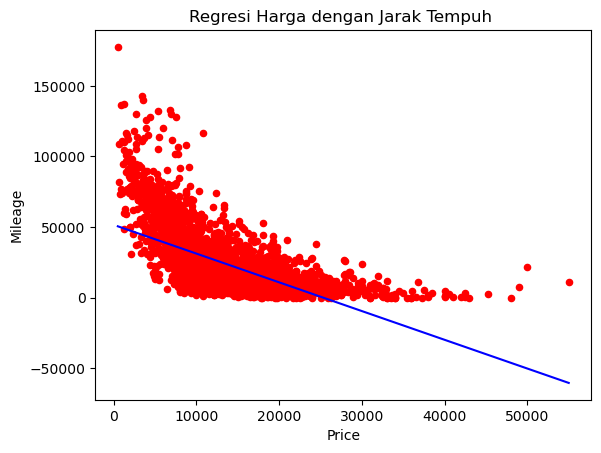

In [429]:
reg1 = df.groupby(['price'])['mileage'].mean().reset_index()
reg1.plot(x="price", y="mileage", kind="scatter", color = 'red')
x = reg1[["price"]]
y = reg1[["mileage"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "blue")
plt.title('Regresi Harga dengan Jarak Tempuh ')
plt.xlabel('Price')
plt.ylabel('Mileage')

**Korelasi harga dengan tax**

--------------------------------------------------------------------------------------

In [415]:
data_pt = df.groupby(['price'])['tax'].mean().reset_index()
data_pt['price'].corr(data_pt['tax'])

0.4556586633594292

Text(0, 0.5, 'Tax')

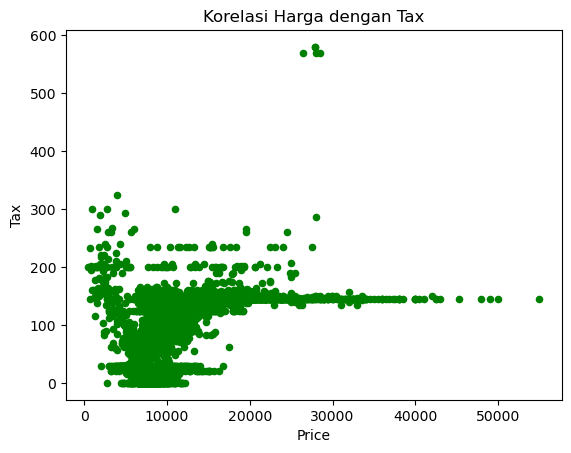

In [430]:
df.groupby(['price'])['tax'].mean().reset_index().plot(x="price", y="tax", kind="scatter", color='green')
plt.title('Korelasi Harga dengan Tax')
plt.xlabel('Price')
plt.ylabel('Tax')

Text(0, 0.5, 'Tax')

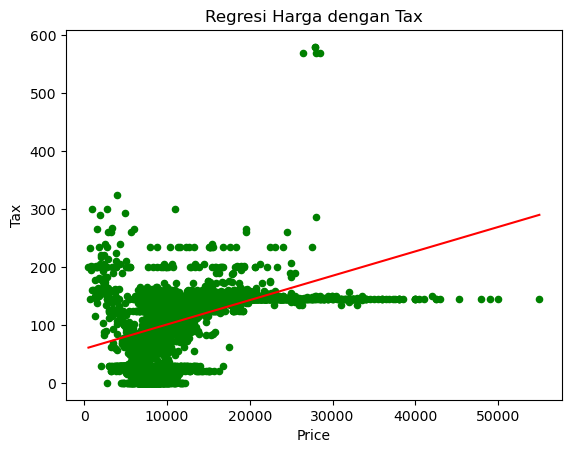

In [431]:
reg1 = df.groupby(['price'])['tax'].mean().reset_index()
reg1.plot(x="price", y="tax", kind="scatter", color = 'green')
x = reg1[["price"]]
y = reg1[["tax"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Harga dengan Tax')
plt.xlabel('Price')
plt.ylabel('Tax')

**Korelasi harga dengan mpg**

--------------------------------------------------------------------------------------

In [365]:
data_pmp = df.groupby(['price'])['mpg'].mean().reset_index()
data_pmp['price'].corr(data_pmp['mpg'])

-0.4516773026568919

Text(0, 0.5, 'MPG')

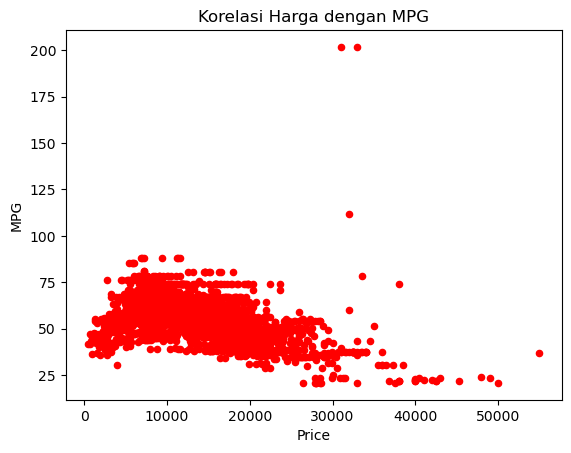

In [432]:
df.groupby(['price'])['mpg'].mean().reset_index().plot(x="price", y="mpg", kind="scatter", color='red')
plt.title('Korelasi Harga dengan MPG')
plt.xlabel('Price')
plt.ylabel('MPG')

Text(0, 0.5, 'MPG')

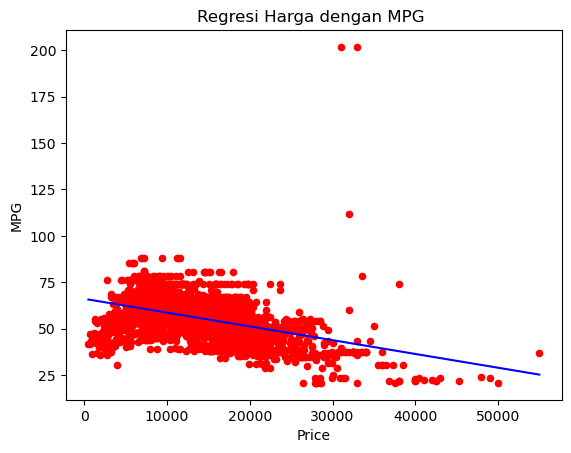

In [434]:
reg1 = df.groupby(['price'])['mpg'].mean().reset_index()
reg1.plot(x="price", y="mpg", kind="scatter", color = 'red')
x = reg1[["price"]]
y = reg1[["mpg"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "blue")
plt.title('Regresi Harga dengan MPG ')
plt.xlabel('Price')
plt.ylabel('MPG')

**Korelasi harga dengan ukuran mesin**

--------------------------------------------------------------------------------------

In [368]:
data_pe = df.groupby(['price'])['engineSize'].mean().reset_index()
data_pe['price'].corr(data_pe['engineSize'])

0.581480219169117

Text(0, 0.5, 'Engine Size')

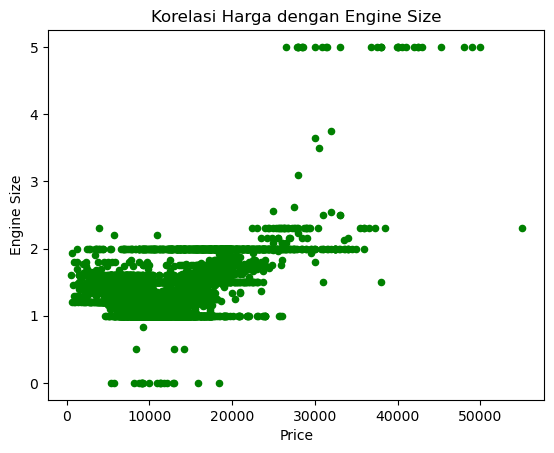

In [435]:
df.groupby(['price'])['engineSize'].mean().reset_index().plot(x="price", y="engineSize", kind="scatter", color='green')
plt.title('Korelasi Harga dengan Engine Size')
plt.xlabel('Price')
plt.ylabel('Engine Size')

Text(0, 0.5, 'Engine Size')

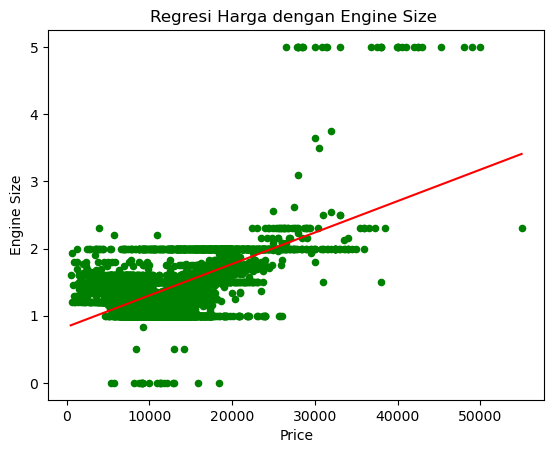

In [436]:
reg1 = df.groupby(['price'])['engineSize'].mean().reset_index()
reg1.plot(x="price", y="engineSize", kind="scatter", color = 'green')
x = reg1[["price"]]
y = reg1[["engineSize"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Harga dengan Engine Size ')
plt.xlabel('Price')
plt.ylabel('Engine Size')

**Korelasi jarak tempuh dengan dengan tax**

--------------------------------------------------------------------------------------

In [371]:
data_mt = df.groupby(['mileage'])['tax'].mean().reset_index()
data_mt['mileage'].corr(data_mt['tax'])

-0.2941184821231385

Text(0, 0.5, 'Tax')

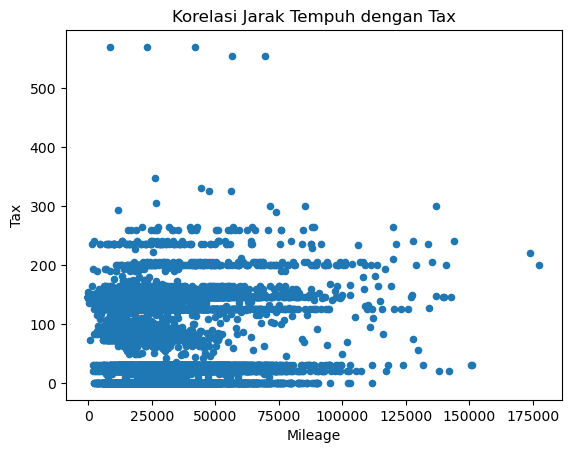

In [372]:
df.groupby(['mileage'])['tax'].mean().reset_index().plot(x="mileage", y="tax", kind="scatter")
plt.title('Korelasi Jarak Tempuh dengan Tax')
plt.xlabel('Mileage')
plt.ylabel('Tax')

Text(0, 0.5, 'Tax')

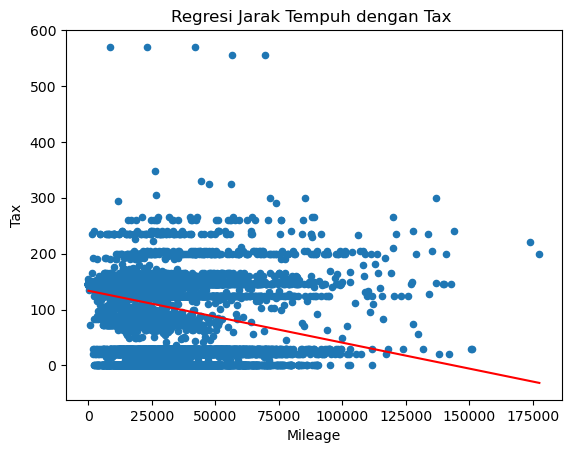

In [439]:
reg1 = df.groupby(['mileage'])['tax'].mean().reset_index()
reg1.plot(x="mileage", y="tax", kind="scatter")
x = reg1[["mileage"]]
y = reg1[["tax"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Jarak Tempuh dengan Tax ')
plt.xlabel('Mileage')
plt.ylabel('Tax')

**Korelasi jarak tempuh dengan mpg**

--------------------------------------------------------------------------------------

In [374]:
data_mmp = df.groupby(['mileage'])['mpg'].mean().reset_index()
data_mmp['mileage'].corr(data_mmp['mpg'])

0.14694809963485989

Text(0, 0.5, 'MPG')

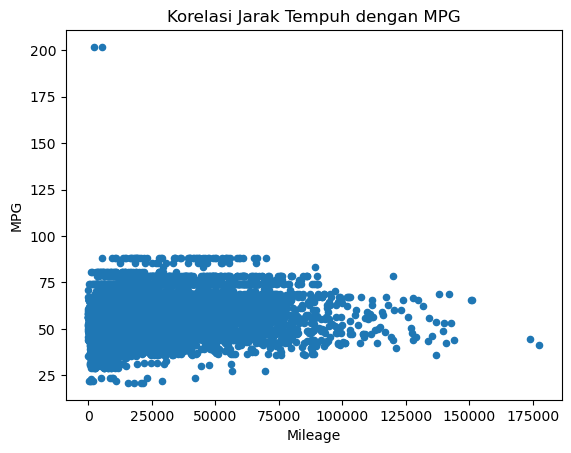

In [375]:
df.groupby(['mileage'])['mpg'].mean().reset_index().plot(x="mileage", y="mpg", kind="scatter")
plt.title('Korelasi Jarak Tempuh dengan MPG')
plt.xlabel('Mileage')
plt.ylabel('MPG')

Text(0, 0.5, 'mpg')

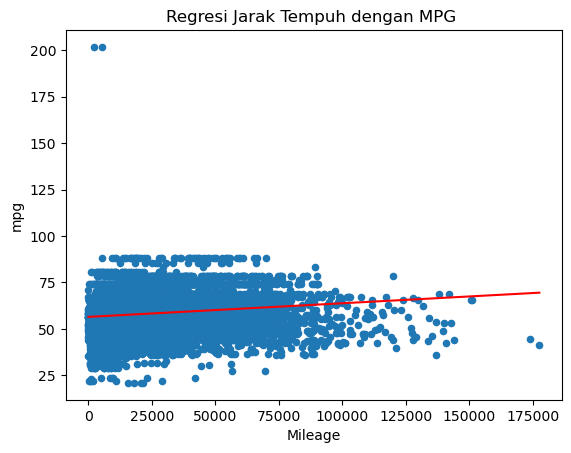

In [441]:
reg1 = df.groupby(['mileage'])['mpg'].mean().reset_index()
reg1.plot(x="mileage", y="mpg", kind="scatter")
x = reg1[["mileage"]]
y = reg1[["mpg"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Jarak Tempuh dengan MPG ')
plt.xlabel('Mileage')
plt.ylabel('mpg')

**Korelasi jarak tempuh dengan ukuran mesin**

--------------------------------------------------------------------------------------

In [377]:
data_me = df.groupby(['mileage'])['engineSize'].mean().reset_index()
data_me['mileage'].corr(data_me['engineSize'])

0.23677010696726053

Text(0, 0.5, 'Engine Size')

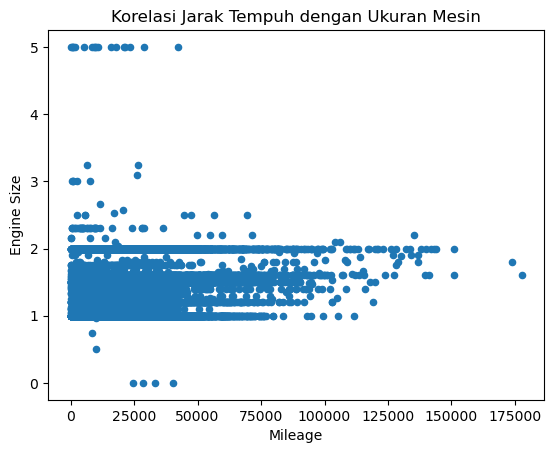

In [378]:
df.groupby(['mileage'])['engineSize'].mean().reset_index().plot(x="mileage", y="engineSize", kind="scatter")
plt.title('Korelasi Jarak Tempuh dengan Ukuran Mesin')
plt.xlabel('Mileage')
plt.ylabel('Engine Size')

Text(0, 0.5, 'Engine Size')

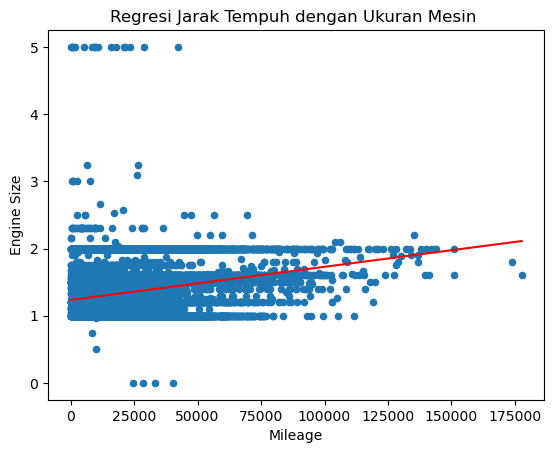

In [442]:
reg1 = df.groupby(['mileage'])['engineSize'].mean().reset_index()
reg1.plot(x="mileage", y="engineSize", kind="scatter")
x = reg1[["mileage"]]
y = reg1[["engineSize"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Jarak Tempuh dengan Ukuran Mesin ')
plt.xlabel('Mileage')
plt.ylabel('Engine Size')

**Korelasi mpg dengan tax**

--------------------------------------------------------------------------------------

In [380]:
data_mpt = df.groupby(['mpg'])['tax'].mean().reset_index()
data_mpt['mpg'].corr(data_mpt['tax'])

-0.48544700794548445

Text(0, 0.5, 'Tax')

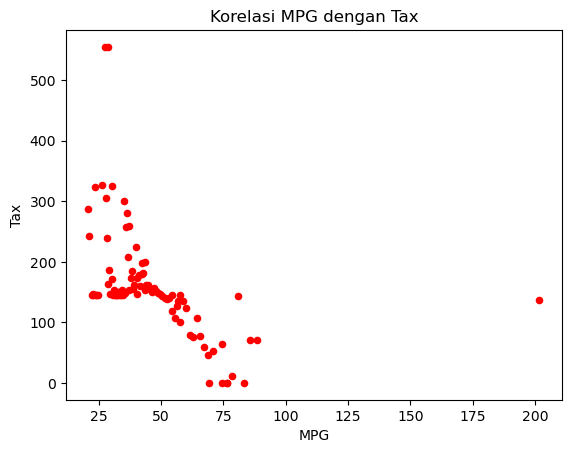

In [443]:
df.groupby(['mpg'])['tax'].mean().reset_index().plot(x="mpg", y="tax", kind="scatter", color='red')
plt.title('Korelasi MPG dengan Tax')
plt.xlabel('MPG')
plt.ylabel('Tax')

Text(0, 0.5, 'Tax')

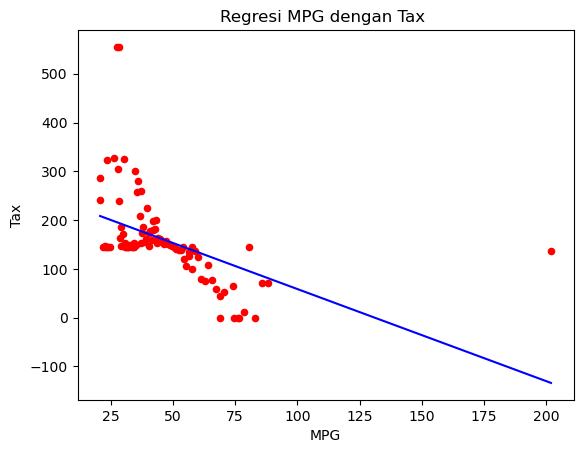

In [444]:
reg1 = df.groupby(['mpg'])['tax'].mean().reset_index()
reg1.plot(x="mpg", y="tax", kind="scatter", color = 'red')
x = reg1[["mpg"]]
y = reg1[["tax"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "blue")
plt.title('Regresi MPG dengan Tax ')
plt.xlabel('MPG')
plt.ylabel('Tax')

**Korelasi ukuran mesin dengan tax**

--------------------------------------------------------------------------------------

In [383]:
data_et = df.groupby(['engineSize'])['tax'].mean().reset_index()
data_et['engineSize'].corr(data_et['tax'])

0.61072998884205

Text(0, 0.5, 'Tax')

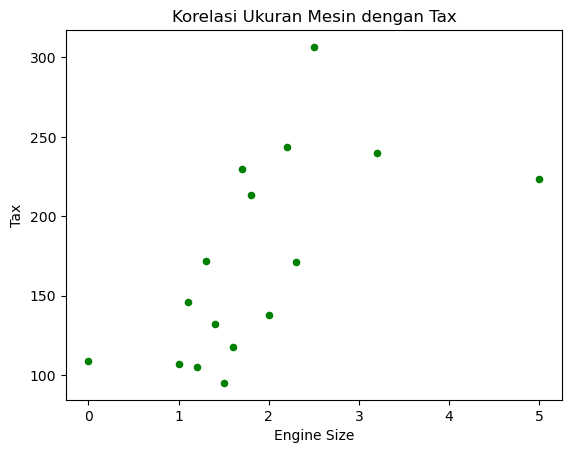

In [445]:
df.groupby(['engineSize'])['tax'].mean().reset_index().plot(x="engineSize", y="tax", kind="scatter", color='green')
plt.title('Korelasi Ukuran Mesin dengan Tax')
plt.xlabel('Engine Size')
plt.ylabel('Tax')

Text(0, 0.5, 'Tax')

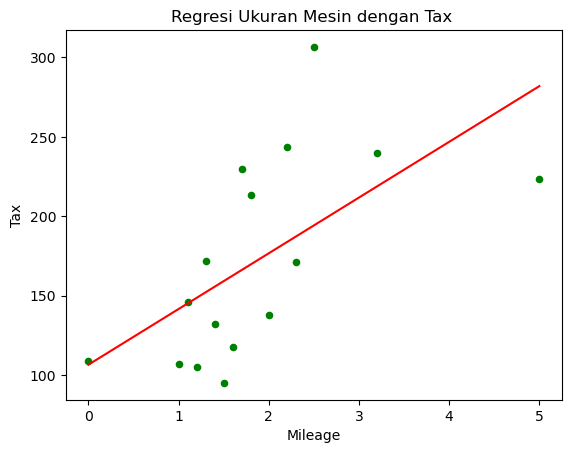

In [446]:
reg1 = df.groupby(['engineSize'])['tax'].mean().reset_index()
reg1.plot(x="engineSize", y="tax", kind="scatter", color = 'green')
x = reg1[["engineSize"]]
y = reg1[["tax"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "red")
plt.title('Regresi Ukuran Mesin dengan Tax ')
plt.xlabel('Mileage')
plt.ylabel('Tax')

**Korelasi ukuran mesin dengan mpg**

--------------------------------------------------------------------------------------

In [386]:
data_emp = df.groupby(['engineSize'])['mpg'].mean().reset_index()
data_emp['engineSize'].corr(data_emp['mpg'])

-0.46007776436338554

Text(0, 0.5, 'MPG')

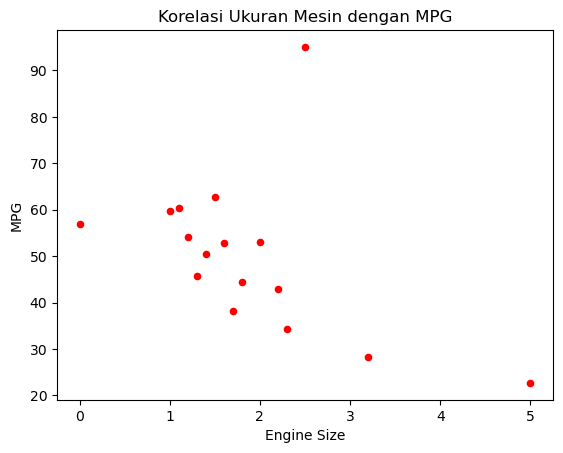

In [447]:
df.groupby(['engineSize'])['mpg'].mean().reset_index().plot(x="engineSize", y="mpg", kind="scatter", color='red')
plt.title('Korelasi Ukuran Mesin dengan MPG')
plt.xlabel('Engine Size')
plt.ylabel('MPG')

Text(0, 0.5, 'MPG')

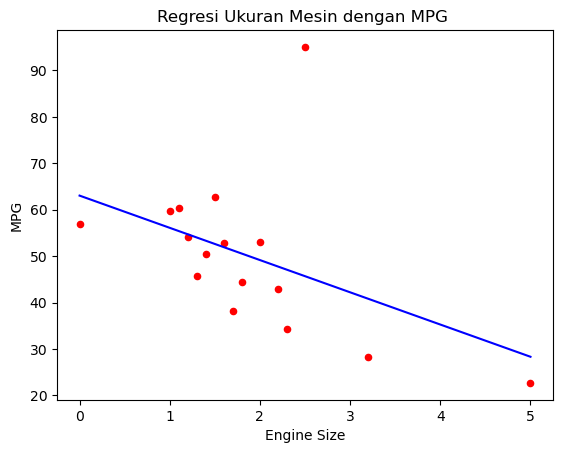

In [448]:
reg1 = df.groupby(['engineSize'])['mpg'].mean().reset_index()
reg1.plot(x="engineSize", y="mpg", kind="scatter", color = 'red')
x = reg1[["engineSize"]]
y = reg1[["mpg"]]
reg = LinearRegression()
reg.fit(x,y)
plt.plot(x, reg.predict(x), color = "blue")
plt.title('Regresi Ukuran Mesin dengan MPG ')
plt.xlabel('Engine Size')
plt.ylabel('MPG')